# NFL Sports Betting Capstone: Automated In-Season Data Scraper
_By Justin Tunley_

My first notebook for this project was pulling the historical data for teams between 2004-2022 from ESPN. This notebook focuses on pulling that same data from ESPN, but only for in-season data.

IMPORTANT FOR ACCURATE RESULTS: as the season continues and new games are played, the data being pulled is going to change on ESPN. This notebook will automatically update and format the new information properly, so long as you re-run the notebook. This means re-scraping from ESPN, rerunning all of the preprocessing and cleaning steps, and re-importing your new CSV. Remember: if you do not rerun this whole notebook, you will have outdated data.

If this notebook looks similar, it is because I duplicated the historical data notebook and changed the scraping method to grab something different. Everything else is essentially the same.

In [1]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportsreference as csr
import html5lib

import requests
from bs4 import BeautifulSoup

## Scraping from ESPN
#### This will be used for the bulk of our information

In [4]:
jets23 = pd.read_html('https://www.espn.com/nfl/team/stats/_/type/team/name/nyj')
# scraping data for THIS SEASON for the New York Jets

In [5]:
jets23[1].index = list(str(x[0]) for x in jets23[0].values)
jets23[1]
# 4 Goals: 
#    1. Split up offensive and defensive stats
#    2. Get each into a single row
#    3. Renaming columns
#    4. Dropping header rows

NY Jets Opponents
Total Points Per Game             15.5      19.8
Total Points                       201       257
Total Touchdowns                    16        24
1st Downs                          NaN       NaN
Total 1st downs                    193       238
Rushing 1st downs                   51        87
Passing 1st downs                  122       122
1st downs by penalty                20        29
3rd down efficiency             43-175    75-191
3rd down %                       24.57     39.27
4th down efficiency              15-22       4-9
4th down %                       68.18     44.44
Passing                            NaN       NaN
Comp-Att                       271-450   243-402
Net Passing Yards                 2300      2173
Yards Per Pass Attempt             6.0       6.0
Net Passing Yards Per Game       176.9     167.2
Passing Touchdowns                   9        14
Interceptions                       11        12
Sacks-Yards Lost                55-389    36-228
Rushing                            NaN       NaN
Rushing Attempts                   277       418
Rushing Yards                     1168      1714
Yards Per Rush Attempt             4.2       4.1
Rushing Yards Per Game            89.8     131.8
Rushing Touchdowns                   4         8
Offense                            NaN       NaN
Total Offensive Plays              782       856
Total Yards                       3857      4115
Yards Per Game                   296.7     316.5
Returns                            NaN       NaN
Kickoffs: Total                 15-327      5-82
Average Kickoff Return Yards      21.8      16.4
Punt: Total                     24-232    37-409
Average Punt Return Yards         11.1       9.7
INT: Total                      12-145    11-186
Average Interception Yards        12.1      16.9
Kicking                            NaN       NaN
Net Average Punt Yards            43.8      41.9
Punt: Total Yards             76-3,737  69-3,126
FG: Good-Attempts                28-29     29-34
Touchback Percentage                86        75
Penalties                          NaN       NaN
Total-Yards                     90-661    68-586
Avg. Per Game (YDS)                 50    45.077
Time of Possession                 NaN       NaN
Possession Time Seconds          28:28     31:53
Miscellaneous                      NaN       NaN
Fumbles-Lost                     25-13      25-7
Turnover Ratio                      -5       184

**Link to in-season data:**<br>

Jets 2023: https://www.espn.com/nfl/team/stats/_/type/team/name/nyj
    
Template: https://www.espn.com/nfl/team/stats/_/type/team/name/ ... **abbrev**
                                                            

**Link to historical data:**<br>

Jets 2022: https://www.espn.com/nfl/team/stats/_/type/team/name/nyj/season/2022/seasontype/2
    
Template: https://www.espn.com/nfl/team/stats/_/type/team/name/ **team** /season/  **year**  /seasontype/2


In [6]:
big_string='''
Cardinals - ari <br>
Falcons - atl <br>
Ravens - bal<br>
Bills - buf<br>
Panthers - car<br>
Bears - chi<br>
Bengals - cin<br>
Browns - cle<br>
Cowboys - dal<br>
Broncos - den<br>
Lions - det<br>
Packers - gb<br>
Texans - hou<br>
Colts - ind<br>
Jaguars - jax<br>
Chiefs - kc<br>
Raiders - lv<br>
Chargers - lac<br>
Rams - lar<br>
Dolphins - mia<br>
Vikings - min<br>
Patriots - ne<br>
Saints - no<br>
Giants - nyg<br>
Jets - nyj<br>
Eagles - phi<br>
Steelers - pit<br>
49ers - sf<br>
Seahawks - sea<br>
Buccaneers - tb<br>
Titans - ten<br>
Commanders - wsh
'''

In [7]:
abbrev = big_string.replace('<br>', '').split()[2::3]
abbrev

['ari',
 'atl',
 'bal',
 'buf',
 'car',
 'chi',
 'cin',
 'cle',
 'dal',
 'den',
 'det',
 'gb',
 'hou',
 'ind',
 'jax',
 'kc',
 'lv',
 'lac',
 'lar',
 'mia',
 'min',
 'ne',
 'no',
 'nyg',
 'nyj',
 'phi',
 'pit',
 'sf',
 'sea',
 'tb',
 'ten',
 'wsh']

In [8]:
# def get_season_df(team,season):
#         template = 'https://www.espn.com/nfl/team/stats/_/type/team/name/nyj/season/2022/seasontype/2'
#         url = template.format(team,season)
#         df_list = pd.read_html(url)
#         df_list[1].index=list(str(x[0]) for x in df_list[0].values)
#         new_columns = ['Offense--{}-{}'.format(team,season),'Opposing-offense-{}-{}'.format(team,season)]
#         df_list[1].columns = new_columns
#         return df_list[1]

# Repeats Arizona 2004 in every single row: break up string




# https://www.espn.com/nfl/team/stats/_/type/team/name/nyj

In [9]:
def get_season_df(team,season):
        template1 = 'https://www.espn.com/nfl/team/stats/_/type/team/name/'
        url = template1 + team
        print(url)
        df_list = pd.read_html(url)
#         curr_season = pull current year from datatime.year()
        
        df_list[1].index=list(str(x[0]) for x in df_list[0].values)
        new_columns = ['Offense--{}-2023'.format(team),'Opposing-offense-{}-2023'.format(team)]
        df_list[1].columns = new_columns
        return df_list[1]

In [10]:
year = 2023

In [11]:
all_df = []
for team in abbrev:
        new_df = get_season_df(team, year)
        all_df.append(new_df)

https://www.espn.com/nfl/team/stats/_/type/team/name/ari
https://www.espn.com/nfl/team/stats/_/type/team/name/atl
https://www.espn.com/nfl/team/stats/_/type/team/name/bal
https://www.espn.com/nfl/team/stats/_/type/team/name/buf
https://www.espn.com/nfl/team/stats/_/type/team/name/car
https://www.espn.com/nfl/team/stats/_/type/team/name/chi
https://www.espn.com/nfl/team/stats/_/type/team/name/cin
https://www.espn.com/nfl/team/stats/_/type/team/name/cle
https://www.espn.com/nfl/team/stats/_/type/team/name/dal
https://www.espn.com/nfl/team/stats/_/type/team/name/den
https://www.espn.com/nfl/team/stats/_/type/team/name/det
https://www.espn.com/nfl/team/stats/_/type/team/name/gb
https://www.espn.com/nfl/team/stats/_/type/team/name/hou
https://www.espn.com/nfl/team/stats/_/type/team/name/ind
https://www.espn.com/nfl/team/stats/_/type/team/name/jax
https://www.espn.com/nfl/team/stats/_/type/team/name/kc
https://www.espn.com/nfl/team/stats/_/type/team/name/lv
https://www.espn.com/nfl/team/stat

In [12]:
current_season_df = pd.concat(all_df, axis=1).T
current_season_df.head()

Total Points Per Game Total Points Total Touchdowns  \
Offense--ari-2023                          17.7          230               25   
Opposing-offense-ari-2023                  25.5          331               39   
Offense--atl-2023                          19.3          251               25   
Opposing-offense-atl-2023                  20.7          269               25   
Offense--bal-2023                          27.8          361               41   

                          1st Downs Total 1st downs Rushing 1st downs  \
Offense--ari-2023               NaN             236                84   
Opposing-offense-ari-2023       NaN             288               105   
Offense--atl-2023               NaN             262                99   
Opposing-offense-atl-2023       NaN             234                71   
Offense--bal-2023               NaN             274               114   

                          Passing 1st downs 1st downs by penalty  \
Offense--ari-2023                       125                   27   
Opposing-offense-ari-2023               159                   24   
Offense--atl-2023                       143                   20   
Opposing-offense-atl-2023               137                   26   
Offense--bal-2023                       133                   27   

                          3rd down efficiency 3rd down %  ...  \
Offense--ari-2023                      64-170      37.65  ...   
Opposing-offense-ari-2023              75-162      46.30  ...   
Offense--atl-2023                      71-175      40.57  ...   
Opposing-offense-atl-2023              58-173      33.53  ...   
Offense--bal-2023                      70-164      42.68  ...   

                          FG: Good-Attempts Touchback Percentage Penalties  \
Offense--ari-2023                     20-23                   84       NaN   
Opposing-offense-ari-2023             20-25                   80       NaN   
Offense--atl-2023                     25-28                   84       NaN   
Opposing-offense-atl-2023             30-31                   84       NaN   
Offense--bal-2023                     24-29                   85       NaN   

                          Total-Yards Avg. Per Game (YDS) Time of Possession  \
Offense--ari-2023              85-771                  59                NaN   
Opposing-offense-ari-2023      82-676                  52                NaN   
Offense--atl-2023              67-593                  45                NaN   
Opposing-offense-atl-2023      88-697              53.615                NaN   
Offense--bal-2023              80-763                  58                NaN   

                          Possession Time Seconds Miscellaneous Fumbles-Lost  \
Offense--ari-2023                           27:53           NaN         14-6   
Opposing-offense-ari-2023                   32:06           NaN          9-6   
Offense--atl-2023                           30:05           NaN         18-9   
Opposing-offense-atl-2023                   29:54           NaN         18-8   
Offense--bal-2023                           31:30           NaN         20-9   

                          Turnover Ratio  
Offense--ari-2023                      0  
Opposing-offense-ari-2023            188  
Offense--atl-2023                     -4  
Opposing-offense-atl-2023            179  
Offense--bal-2023                      4  

[5 rows x 50 columns]

## Data Preprocessing and Cleaning

In [13]:
current_season_df.shape
# MAKE SURE YOU ARE COMPLETELY DONE SCRAPING BEFORE CONCATENATING
# YOU WILL NOT GET AN ERROR MESSAGE, YOU WILL JUST BE MISSING ROWS. MAKE SURE SHAPE IS 1216 X 50

(64, 50)

In [14]:
pd.set_option('display.max_columns',None)
# so that we can view all columns

In [15]:
current_season_df.tail()
# not organized by year, so can't just grab the last 'x' rows

Total Points Per Game Total Points Total Touchdowns  \
Opposing-offense-tb-2023                   20.8          270               28   
Offense--ten-2023                          18.5          241               23   
Opposing-offense-ten-2023                  21.7          282               26   
Offense--wsh-2023                          20.1          261               29   
Opposing-offense-wsh-2023                  30.4          395               45   

                          1st Downs Total 1st downs Rushing 1st downs  \
Opposing-offense-tb-2023        NaN             265                79   
Offense--ten-2023               NaN             231                76   
Opposing-offense-ten-2023       NaN             252                83   
Offense--wsh-2023               NaN             265                81   
Opposing-offense-wsh-2023       NaN             256                80   

                          Passing 1st downs 1st downs by penalty  \
Opposing-offense-tb-2023                168                   18   
Offense--ten-2023                       123                   32   
Opposing-offense-ten-2023               139                   30   
Offense--wsh-2023                       159                   25   
Opposing-offense-wsh-2023               159                   17   

                          3rd down efficiency 3rd down % 4th down efficiency  \
Opposing-offense-tb-2023               73-174      41.95                9-18   
Offense--ten-2023                      53-162      32.72                7-13   
Opposing-offense-ten-2023              67-178      37.64               11-17   
Offense--wsh-2023                      66-171      38.60                9-18   
Opposing-offense-wsh-2023              71-175      40.57               11-17   

                          4th down % Passing Comp-Att Net Passing Yards  \
Opposing-offense-tb-2023       50.00     NaN  311-476              3433   
Offense--ten-2023              53.85     NaN  233-388              2518   
Opposing-offense-ten-2023      64.71     NaN  286-424              2978   
Offense--wsh-2023              50.00     NaN  335-509              3071   
Opposing-offense-wsh-2023      64.71     NaN  288-448              3458   

                          Yards Per Pass Attempt Net Passing Yards Per Game  \
Opposing-offense-tb-2023                     7.7                      264.1   
Offense--ten-2023                            7.2                      193.7   
Opposing-offense-ten-2023                    7.6                      229.1   
Offense--wsh-2023                            6.8                      236.2   
Opposing-offense-wsh-2023                    8.1                      266.0   

                          Passing Touchdowns Interceptions Sacks-Yards Lost  \
Opposing-offense-tb-2023                  17            11           38-244   
Offense--ten-2023                         11             9           43-279   
Opposing-offense-ten-2023                 14             3           37-254   
Offense--wsh-2023                         18            14           58-395   
Opposing-offense-wsh-2023                 30             6           35-155   

                          Rushing Rushing Attempts Rushing Yards  \
Opposing-offense-tb-2023      NaN              328          1284   
Offense--ten-2023             NaN              336          1390   
Opposing-offense-ten-2023     NaN              377          1432   
Offense--wsh-2023             NaN              285          1299   
Opposing-offense-wsh-2023     NaN              339          1480   

                          Yards Per Rush Attempt Rushing Yards Per Game  \
Opposing-offense-tb-2023                     3.9                   98.8   
Offense--ten-2023                            4.1                  106.9   
Opposing-offense-ten-2023                    3.8                  110.2   
Offense--wsh-2023                            4.6                   99.9   
Opposing-offense-wsh-2023

In [16]:
current_season_df.columns

Index(['Total Points Per Game', 'Total Points', 'Total Touchdowns',
       '1st Downs', 'Total 1st downs', 'Rushing 1st downs',
       'Passing 1st downs', '1st downs by penalty', '3rd down efficiency',
       '3rd down %', '4th down efficiency', '4th down %', 'Passing',
       'Comp-Att', 'Net Passing Yards', 'Yards Per Pass Attempt',
       'Net Passing Yards Per Game', 'Passing Touchdowns', 'Interceptions',
       'Sacks-Yards Lost', 'Rushing', 'Rushing Attempts', 'Rushing Yards',
       'Yards Per Rush Attempt', 'Rushing Yards Per Game',
       'Rushing Touchdowns', 'Offense', 'Total Offensive Plays', 'Total Yards',
       'Yards Per Game', 'Returns', 'Kickoffs: Total',
       'Average Kickoff Return Yards', 'Punt: Total',
       'Average Punt Return Yards', 'INT: Total', 'Average Interception Yards',
       'Kicking', 'Net Average Punt Yards', 'Punt: Total Yards',
       'FG: Good-Attempts', 'Touchback Percentage', 'Penalties', 'Total-Yards',
       'Avg. Per Game (YDS)', 'Time of

In [17]:
#setting index as a column instead for easy manipulation 
current_season_df = current_season_df.reset_index()
current_season_df.rename(columns={'index':'SeasonID'}, inplace=True) #renaming new column 

In [18]:
current_season_df

SeasonID Total Points Per Game Total Points  \
0           Offense--ari-2023                  17.7          230   
1   Opposing-offense-ari-2023                  25.5          331   
2           Offense--atl-2023                  19.3          251   
3   Opposing-offense-atl-2023                  20.7          269   
4           Offense--bal-2023                  27.8          361   
..                        ...                   ...          ...   
59   Opposing-offense-tb-2023                  20.8          270   
60          Offense--ten-2023                  18.5          241   
61  Opposing-offense-ten-2023                  21.7          282   
62          Offense--wsh-2023                  20.1          261   
63  Opposing-offense-wsh-2023                  30.4          395   

   Total Touchdowns 1st Downs Total 1st downs Rushing 1st downs  \
0                25       NaN             236                84   
1                39       NaN             288               105   
2                25       NaN             262                99   
3                25       NaN             234                71   
4                41       NaN             274               114   
..              ...       ...             ...               ...   
59               28       NaN             265                79   
60               23       NaN             231                76   
61               26       NaN             252                83   
62               29       NaN             265                81   
63               45       NaN             256                80   

   Passing 1st downs 1st downs by penalty 3rd down efficiency 3rd down %  \
0                125                   27              64-170      37.65   
1                159                   24              75-162      46.30   
2                143                   20              71-175      40.57   
3                137                   26              58-173      33.53   
4                133                   27              70-164      42.68   
..               ...                  ...                 ...        ...   
59               168                   18              73-174      41.95   
60               123                   32              53-162      32.72   
61               139                   30              67-178      37.64   
62               159                   25              66-171      38.60   
63               159                   17              71-175      40.57   

   4th down efficiency 4th down % Passing Comp-Att Net Passing Yards  \
0                 8-25      32.00     NaN  258-417              2241   
1                 6-14      42.86     NaN  279-399              2808   
2                 7-15      46.67     NaN  254-410              2659   
3                 8-15      53.33     NaN  260-428              2639   
4                 4-10      40.00     NaN  257-385              2800   
..                 ...        ...     ...      ...               ...   
59                9-18      50.00     NaN  311-476              3433   
60                7-13      53.85     NaN  233-388              2518   
61               11-17      64.71     NaN  286-424              2978   
62                9-18      50.00     NaN  335-509              3071   
63               11-17      64.71     NaN  288-448              3458   

   Yards Per Pass Attempt Net Passing Yards Per Game Passing Touchdowns  \
0                     6.0                      172.4                 11   
1                     7.6                      216.0                 22   
2                     7.1                      204.5                 12   
3                     6.6                      203.0                 19   
4                     7.7                      215.4                 17   
..                    ...                        ...                ...   
59                    7.7                      264.1                 17   
60                   

In [19]:
current_season_df['Games'] = 17
# Set all current season to 17 games

In [20]:
# Currently, each team has 2 rows per season, one displaying offense and one displaying opposing offense (defense)
# We will be combining these into one row per team.

In [21]:
# New dataframe for just the offense
offDF = current_season_df.loc[current_season_df['SeasonID'].str.contains('Offense--'),:]

In [22]:
# New dataframe for just the defense
defDF = current_season_df.loc[current_season_df['SeasonID'].str.contains('Opposing-'),:]

In [23]:
offDF.reset_index(inplace=True)
offDF.drop(columns='index')

SeasonID Total Points Per Game Total Points Total Touchdowns  \
0   Offense--ari-2023                  17.7          230               25   
1   Offense--atl-2023                  19.3          251               25   
2   Offense--bal-2023                  27.8          361               41   
3   Offense--buf-2023                  26.8          348               41   
4   Offense--car-2023                  15.2          197               19   
5   Offense--chi-2023                  20.8          270               28   
6   Offense--cin-2023                  21.9          307               34   
7   Offense--cle-2023                  22.2          289               28   
8   Offense--dal-2023                  32.4          421               47   
9   Offense--den-2023                  22.1          287               30   
10  Offense--det-2023                  26.2          340               42   
11   Offense--gb-2023                  21.5          280               32   
12  Offense--hou-2023                  22.1          287               31   
13  Offense--ind-2023                  24.6          344               38   
14  Offense--jax-2023                  24.0          312               34   
15   Offense--kc-2023                  22.5          292               32   
16   Offense--lv-2023                  18.9          265               29   
17  Offense--lac-2023                  21.6          303               35   
18  Offense--lar-2023                  23.0          299               31   
19  Offense--mia-2023                  31.6          411               53   
20  Offense--min-2023                  20.7          290               33   
21   Offense--ne-2023                  13.0          169               19   
22   Offense--no-2023                  21.9          285               30   
23  Offense--nyg-2023                  14.1          183               20   
24  Offense--nyj-2023                  15.5          201               16   
25  Offense--phi-2023                  26.3          342               39   
26  Offense--pit-2023                  15.9          223               22   
27   Offense--sf-2023                  29.2          380               47   
28  Offense--sea-2023                  21.5          280               29   
29   Offense--tb-2023                  20.2          262               28   
30  Offense--ten-2023                  18.5          241               23   
31  Offense--wsh-2023                  20.1          261               29   

   1st Downs Total 1st downs Rushing 1st downs Passing 1st downs  \
0        NaN             236                84               125   
1        NaN             262                99               143   
2        NaN             274               114               133   
3        NaN             292               112               161   
4        NaN             236                85               122   
5        NaN             253               105               135   
6        NaN             270                70               174   
7        NaN             252               102               124   
8        NaN             304                89               179   
9        NaN             229                87               113   
10       NaN             278                93               167   
11       NaN             243                68               155   
12       NaN             252                64               168   
13       NaN             267                90               151   
14       NaN             261                77               152   
15       NaN             285                89               174   
16       NaN             232                61               148   
17       NaN             262                69               172   
18       NaN             264                80               153   
19       NaN             286                93               176   
20       NaN             284               

In [24]:
offNames = list('OFF_{}'.format(col) for col in offDF.columns)
# renaming all column headers in this dataframe to begin with off_. This is important for distinguishing between columns
# of the same name when we re-concatenate.

In [25]:
offDF.columns = offNames

In [26]:
offDF.head()

OFF_index       OFF_SeasonID OFF_Total Points Per Game OFF_Total Points  \
0          0  Offense--ari-2023                      17.7              230   
1          2  Offense--atl-2023                      19.3              251   
2          4  Offense--bal-2023                      27.8              361   
3          6  Offense--buf-2023                      26.8              348   
4          8  Offense--car-2023                      15.2              197   

  OFF_Total Touchdowns OFF_1st Downs OFF_Total 1st downs  \
0                   25           NaN                 236   
1                   25           NaN                 262   
2                   41           NaN                 274   
3                   41           NaN                 292   
4                   19           NaN                 236   

  OFF_Rushing 1st downs OFF_Passing 1st downs OFF_1st downs by penalty  \
0                    84                   125                       27   
1                    99                   143                       20   
2                   114                   133                       27   
3                   112                   161                       19   
4                    85                   122                       29   

  OFF_3rd down efficiency OFF_3rd down % OFF_4th down efficiency  \
0                  64-170          37.65                    8-25   
1                  71-175          40.57                    7-15   
2                  70-164          42.68                    4-10   
3                  83-170          48.82                    8-13   
4                  71-196          36.22                   17-36   

  OFF_4th down % OFF_Passing OFF_Comp-Att OFF_Net Passing Yards  \
0          32.00         NaN      258-417                  2241   
1          46.67         NaN      254-410                  2659   
2          40.00         NaN      257-385                  2800   
3          61.54         NaN      318-475                  3340   
4          47.22         NaN      279-476                  2154   

  OFF_Yards Per Pass Attempt OFF_Net Passing Yards Per Game  \
0                        6.0                          172.4   
1                        7.1                          204.5   
2                        7.7                          215.4   
3                        7.3                          256.9   
4                        5.4                          165.7   

  OFF_Passing Touchdowns OFF_Interceptions OFF_Sacks-Yards Lost OFF_Rushing  \
0                     11                 9               35-254         NaN   
1                     12                10               36-237         NaN   
2                     17                 6               31-172         NaN   
3                     25                14               18-107         NaN   
4                     11                 9               51-406         NaN   

  OFF_Rushing Attempts OFF_Rushing Yards OFF_Yards Per Rush Attempt  \
0                  343              1611                        4.7   
1                  412              1718                        4.2   
2                  416              2042                        4.9   
3                  360              1586                        4.4   
4                  340              1356                        4.0   

  OFF_Rushing Yards Per Game OFF_Rushing Touchdowns OFF_Offense  \
0                      123.9                     13         NaN   
1                      132.2                     12         NaN   
2                      157.1                     22         NaN   
3                      122.0                     15         NaN   
4                      104.3                      5         NaN   

  OFF_Total Offensive Plays OFF_Total Yards OFF_Yards Per Game OFF_Returns  \
0                       795            4106              315.8         NaN   
1                       858            4614              354.9         NaN  

In [27]:
defDF.reset_index(inplace=True)
defDF.drop(columns='index')
# do it again for the defense

SeasonID Total Points Per Game Total Points  \
0   Opposing-offense-ari-2023                  25.5          331   
1   Opposing-offense-atl-2023                  20.7          269   
2   Opposing-offense-bal-2023                  16.8          218   
3   Opposing-offense-buf-2023                  18.8          244   
4   Opposing-offense-car-2023                  26.2          341   
5   Opposing-offense-chi-2023                  23.8          309   
6   Opposing-offense-cin-2023                  22.2          311   
7   Opposing-offense-cle-2023                  20.9          272   
8   Opposing-offense-dal-2023                  17.9          233   
9   Opposing-offense-den-2023                  23.8          309   
10  Opposing-offense-det-2023                  24.2          314   
11   Opposing-offense-gb-2023                  20.5          267   
12  Opposing-offense-hou-2023                  21.5          279   
13  Opposing-offense-ind-2023                  24.5          343   
14  Opposing-offense-jax-2023                  22.3          290   
15   Opposing-offense-kc-2023                  17.5          228   
16   Opposing-offense-lv-2023                  20.0          280   
17  Opposing-offense-lac-2023                  24.6          345   
18  Opposing-offense-lar-2023                  22.3          290   
19  Opposing-offense-mia-2023                  22.6          294   
20  Opposing-offense-min-2023                  19.2          269   
21   Opposing-offense-ne-2023                  20.9          272   
22   Opposing-offense-no-2023                  20.1          261   
23  Opposing-offense-nyg-2023                  24.2          314   
24  Opposing-offense-nyj-2023                  19.8          257   
25  Opposing-offense-phi-2023                  24.7          321   
26  Opposing-offense-pit-2023                  20.0          280   
27   Opposing-offense-sf-2023                  15.8          205   
28  Opposing-offense-sea-2023                  24.5          318   
29   Opposing-offense-tb-2023                  20.8          270   
30  Opposing-offense-ten-2023                  21.7          282   
31  Opposing-offense-wsh-2023                  30.4          395   

   Total Touchdowns 1st Downs Total 1st downs Rushing 1st downs  \
0                39       NaN             288               105   
1                25       NaN             234                71   
2                19       NaN             233                71   
3                27       NaN             249                71   
4                42       NaN             244                95   
5                36       NaN             238                64   
6                34       NaN             307               109   
7                33       NaN             182                63   
8                28       NaN             228                74   
9                34       NaN             269                92   
10               37       NaN             259                73   
11               28       NaN             266               104   
12               29       NaN             260                86   
13               37       NaN             281               106   
14               35       NaN             241                71   
15               26       NaN             236                83   
16               31       NaN             278                98   
17               42       NaN             300                91   
18               29       NaN             260                87   
19               35       NaN             241                83   
20               26       NaN             253                81   
21               28       NaN             235                70   
22               27       NaN             238                89   
23               37       NaN             263                99   
24               24       NaN             238                87   
25               38       NaN     

In [28]:
defNames = list('DEF_{}'.format(col) for col in defDF.columns)

In [29]:
defDF.columns = defNames

In [30]:
defDF.head()

DEF_index               DEF_SeasonID DEF_Total Points Per Game  \
0          1  Opposing-offense-ari-2023                      25.5   
1          3  Opposing-offense-atl-2023                      20.7   
2          5  Opposing-offense-bal-2023                      16.8   
3          7  Opposing-offense-buf-2023                      18.8   
4          9  Opposing-offense-car-2023                      26.2   

  DEF_Total Points DEF_Total Touchdowns DEF_1st Downs DEF_Total 1st downs  \
0              331                   39           NaN                 288   
1              269                   25           NaN                 234   
2              218                   19           NaN                 233   
3              244                   27           NaN                 249   
4              341                   42           NaN                 244   

  DEF_Rushing 1st downs DEF_Passing 1st downs DEF_1st downs by penalty  \
0                   105                   159                       24   
1                    71                   137                       26   
2                    71                   131                       31   
3                    71                   150                       28   
4                    95                   127                       22   

  DEF_3rd down efficiency DEF_3rd down % DEF_4th down efficiency  \
0                  75-162          46.30                    6-14   
1                  58-173          33.53                    8-15   
2                  70-193          36.27                    8-22   
3                  66-168          39.29                    9-17   
4                  57-162          35.19                     6-8   

  DEF_4th down % DEF_Passing DEF_Comp-Att DEF_Net Passing Yards  \
0          42.86         NaN      279-399                  2808   
1          53.33         NaN      260-428                  2639   
2          36.36         NaN      293-487                  2342   
3          52.94         NaN      286-432                  2703   
4          75.00         NaN      243-377                  2280   

  DEF_Yards Per Pass Attempt DEF_Net Passing Yards Per Game  \
0                        7.6                          216.0   
1                        6.6                          203.0   
2                        5.6                          180.2   
3                        6.8                          207.9   
4                        6.4                          175.4   

  DEF_Passing Touchdowns DEF_Interceptions DEF_Sacks-Yards Lost DEF_Rushing  \
0                     22                 9               32-233         NaN   
1                     19                 7               27-168         NaN   
2                     13                11               49-386         NaN   
3                     17                12               42-242         NaN   
4                     16                 7               20-143         NaN   

  DEF_Rushing Attempts DEF_Rushing Yards DEF_Yards Per Rush Attempt  \
0                  408              1811                        4.4   
1                  366              1442                        3.9   
2                  316              1355                        4.3   
3                  318              1482                        4.7   
4                  379              1599                        4.2   

  DEF_Rushing Yards Per Game DEF_Rushing Touchdowns DEF_Offense  \
0                      139.3                     16         NaN   
1                      110.9                      5         NaN   
2                      104.2                      4         NaN   
3                      114.0                      9         NaN   
4                      123.0                     21         NaN   

  DEF_Total Offensive Plays DEF_Total Yards DEF_Yards Per Game DEF_Returns  \
0                       839            4852              373.2         NaN   
1                       821 

In [31]:
defDF.shape

(32, 53)

In [32]:
offDF.shape

(32, 53)

In [33]:
final_df = pd.merge(offDF, defDF, left_index=True, right_index=True)

In [34]:
final_df.head()

OFF_index       OFF_SeasonID OFF_Total Points Per Game OFF_Total Points  \
0          0  Offense--ari-2023                      17.7              230   
1          2  Offense--atl-2023                      19.3              251   
2          4  Offense--bal-2023                      27.8              361   
3          6  Offense--buf-2023                      26.8              348   
4          8  Offense--car-2023                      15.2              197   

  OFF_Total Touchdowns OFF_1st Downs OFF_Total 1st downs  \
0                   25           NaN                 236   
1                   25           NaN                 262   
2                   41           NaN                 274   
3                   41           NaN                 292   
4                   19           NaN                 236   

  OFF_Rushing 1st downs OFF_Passing 1st downs OFF_1st downs by penalty  \
0                    84                   125                       27   
1                    99                   143                       20   
2                   114                   133                       27   
3                   112                   161                       19   
4                    85                   122                       29   

  OFF_3rd down efficiency OFF_3rd down % OFF_4th down efficiency  \
0                  64-170          37.65                    8-25   
1                  71-175          40.57                    7-15   
2                  70-164          42.68                    4-10   
3                  83-170          48.82                    8-13   
4                  71-196          36.22                   17-36   

  OFF_4th down % OFF_Passing OFF_Comp-Att OFF_Net Passing Yards  \
0          32.00         NaN      258-417                  2241   
1          46.67         NaN      254-410                  2659   
2          40.00         NaN      257-385                  2800   
3          61.54         NaN      318-475                  3340   
4          47.22         NaN      279-476                  2154   

  OFF_Yards Per Pass Attempt OFF_Net Passing Yards Per Game  \
0                        6.0                          172.4   
1                        7.1                          204.5   
2                        7.7                          215.4   
3                        7.3                          256.9   
4                        5.4                          165.7   

  OFF_Passing Touchdowns OFF_Interceptions OFF_Sacks-Yards Lost OFF_Rushing  \
0                     11                 9               35-254         NaN   
1                     12                10               36-237         NaN   
2                     17                 6               31-172         NaN   
3                     25                14               18-107         NaN   
4                     11                 9               51-406         NaN   

  OFF_Rushing Attempts OFF_Rushing Yards OFF_Yards Per Rush Attempt  \
0                  343              1611                        4.7   
1                  412              1718                        4.2   
2                  416              2042                        4.9   
3                  360              1586                        4.4   
4                  340              1356                        4.0   

  OFF_Rushing Yards Per Game OFF_Rushing Touchdowns OFF_Offense  \
0                      123.9                     13         NaN   
1                      132.2                     12         NaN   
2                      157.1                     22         NaN   
3                      122.0                     15         NaN   
4                      104.3                      5         NaN   

  OFF_Total Offensive Plays OFF_Total Yards OFF_Yards Per Game OFF_Returns  \
0                       795            4106              315.8         NaN   
1                       858            4614              354.9         NaN  

In [35]:
final_df.shape

(32, 106)

In [36]:
final_df.duplicated().sum()
# thank god

0

In [37]:
final_df.columns

Index(['OFF_index', 'OFF_SeasonID', 'OFF_Total Points Per Game',
       'OFF_Total Points', 'OFF_Total Touchdowns', 'OFF_1st Downs',
       'OFF_Total 1st downs', 'OFF_Rushing 1st downs', 'OFF_Passing 1st downs',
       'OFF_1st downs by penalty',
       ...
       'DEF_Touchback Percentage', 'DEF_Penalties', 'DEF_Total-Yards',
       'DEF_Avg. Per Game (YDS)', 'DEF_Time of Possession',
       'DEF_Possession Time Seconds', 'DEF_Miscellaneous', 'DEF_Fumbles-Lost',
       'DEF_Turnover Ratio', 'DEF_Games'],
      dtype='object', length=106)

In [38]:
pd.set_option('display.max_rows',None)
final_df.isna().sum()
# this is also good. 1st downs, passing, rushing, offense, returns and all other columns with nulls are headers
# on the original dataset. They describe the columns that follow, and are therefore unnecessary. They can be dropped.

OFF_index                            0
OFF_SeasonID                         0
OFF_Total Points Per Game            0
OFF_Total Points                     0
OFF_Total Touchdowns                 0
OFF_1st Downs                       32
OFF_Total 1st downs                  0
OFF_Rushing 1st downs                0
OFF_Passing 1st downs                0
OFF_1st downs by penalty             0
OFF_3rd down efficiency              0
OFF_3rd down %                       0
OFF_4th down efficiency              0
OFF_4th down %                       0
OFF_Passing                         32
OFF_Comp-Att                         0
OFF_Net Passing Yards                0
OFF_Yards Per Pass Attempt           0
OFF_Net Passing Yards Per Game       0
OFF_Passing Touchdowns               0
OFF_Interceptions                    0
OFF_Sacks-Yards Lost                 0
OFF_Rushing                         32
OFF_Rushing Attempts                 0
OFF_Rushing Yards                    0
OFF_Yards Per Rush Attemp

In [39]:
# We'll start by dropping the header columns (columns used to classify the columns that follow them on ESPN). 
final_df = final_df.drop(columns=['OFF_1st Downs', 'OFF_Passing', 'OFF_Offense', 'OFF_Returns', 'OFF_Kicking', 'OFF_Penalties', 'OFF_Time of Possession', 'OFF_Miscellaneous'])

In [40]:
final_df.head()
# check to make sure it worked

OFF_index       OFF_SeasonID OFF_Total Points Per Game OFF_Total Points  \
0          0  Offense--ari-2023                      17.7              230   
1          2  Offense--atl-2023                      19.3              251   
2          4  Offense--bal-2023                      27.8              361   
3          6  Offense--buf-2023                      26.8              348   
4          8  Offense--car-2023                      15.2              197   

  OFF_Total Touchdowns OFF_Total 1st downs OFF_Rushing 1st downs  \
0                   25                 236                    84   
1                   25                 262                    99   
2                   41                 274                   114   
3                   41                 292                   112   
4                   19                 236                    85   

  OFF_Passing 1st downs OFF_1st downs by penalty OFF_3rd down efficiency  \
0                   125                       27                  64-170   
1                   143                       20                  71-175   
2                   133                       27                  70-164   
3                   161                       19                  83-170   
4                   122                       29                  71-196   

  OFF_3rd down % OFF_4th down efficiency OFF_4th down % OFF_Comp-Att  \
0          37.65                    8-25          32.00      258-417   
1          40.57                    7-15          46.67      254-410   
2          42.68                    4-10          40.00      257-385   
3          48.82                    8-13          61.54      318-475   
4          36.22                   17-36          47.22      279-476   

  OFF_Net Passing Yards OFF_Yards Per Pass Attempt  \
0                  2241                        6.0   
1                  2659                        7.1   
2                  2800                        7.7   
3                  3340                        7.3   
4                  2154                        5.4   

  OFF_Net Passing Yards Per Game OFF_Passing Touchdowns OFF_Interceptions  \
0                          172.4                     11                 9   
1                          204.5                     12                10   
2                          215.4                     17                 6   
3                          256.9                     25                14   
4                          165.7                     11                 9   

  OFF_Sacks-Yards Lost OFF_Rushing OFF_Rushing Attempts OFF_Rushing Yards  \
0               35-254         NaN                  343              1611   
1               36-237         NaN                  412              1718   
2               31-172         NaN                  416              2042   
3               18-107         NaN                  360              1586   
4               51-406         NaN                  340              1356   

  OFF_Yards Per Rush Attempt OFF_Rushing Yards Per Game  \
0                        4.7                      123.9   
1                        4.2                      132.2   
2                        4.9                      157.1   
3                        4.4                      122.0   
4                        4.0                      104.3   

  OFF_Rushing Touchdowns OFF_Total Offensive Plays OFF_Total Yards  \
0                     13                       795            4106   
1                     12                       858            4614   
2                     22                       832            5014   
3                     15                       853            5033   
4                      5                       867            3916   

  OFF_Yards Per Game OFF_Kickoffs: Total OFF_Average Kickoff Return Yards  \
0              315.8              11-204                             18.5   
1              354.9              11-193              

In [41]:
final_df = final_df.drop(columns=['DEF_1st Downs', 'DEF_Passing', 'DEF_Offense', 'DEF_Returns', 'DEF_Kicking', 'DEF_Penalties', 'DEF_Time of Possession', 'DEF_Miscellaneous'])
# same rows as before but defense

In [42]:
final_df = final_df.drop(columns=['OFF_Rushing', 'DEF_Rushing', 'DEF_SeasonID'])
# forgot rushing for both so dropping those. Drop year because its redundant, and def_season ID because we can 
# identify defensive stats by their new column name

In [43]:
final_df.head()

OFF_index       OFF_SeasonID OFF_Total Points Per Game OFF_Total Points  \
0          0  Offense--ari-2023                      17.7              230   
1          2  Offense--atl-2023                      19.3              251   
2          4  Offense--bal-2023                      27.8              361   
3          6  Offense--buf-2023                      26.8              348   
4          8  Offense--car-2023                      15.2              197   

  OFF_Total Touchdowns OFF_Total 1st downs OFF_Rushing 1st downs  \
0                   25                 236                    84   
1                   25                 262                    99   
2                   41                 274                   114   
3                   41                 292                   112   
4                   19                 236                    85   

  OFF_Passing 1st downs OFF_1st downs by penalty OFF_3rd down efficiency  \
0                   125                       27                  64-170   
1                   143                       20                  71-175   
2                   133                       27                  70-164   
3                   161                       19                  83-170   
4                   122                       29                  71-196   

  OFF_3rd down % OFF_4th down efficiency OFF_4th down % OFF_Comp-Att  \
0          37.65                    8-25          32.00      258-417   
1          40.57                    7-15          46.67      254-410   
2          42.68                    4-10          40.00      257-385   
3          48.82                    8-13          61.54      318-475   
4          36.22                   17-36          47.22      279-476   

  OFF_Net Passing Yards OFF_Yards Per Pass Attempt  \
0                  2241                        6.0   
1                  2659                        7.1   
2                  2800                        7.7   
3                  3340                        7.3   
4                  2154                        5.4   

  OFF_Net Passing Yards Per Game OFF_Passing Touchdowns OFF_Interceptions  \
0                          172.4                     11                 9   
1                          204.5                     12                10   
2                          215.4                     17                 6   
3                          256.9                     25                14   
4                          165.7                     11                 9   

  OFF_Sacks-Yards Lost OFF_Rushing Attempts OFF_Rushing Yards  \
0               35-254                  343              1611   
1               36-237                  412              1718   
2               31-172                  416              2042   
3               18-107                  360              1586   
4               51-406                  340              1356   

  OFF_Yards Per Rush Attempt OFF_Rushing Yards Per Game  \
0                        4.7                      123.9   
1                        4.2                      132.2   
2                        4.9                      157.1   
3                        4.4                      122.0   
4                        4.0                      104.3   

  OFF_Rushing Touchdowns OFF_Total Offensive Plays OFF_Total Yards  \
0                     13                       795            4106   
1                     12                       858            4614   
2                     22                       832            5014   
3                     15                       853            5033   
4                      5                       867            3916   

  OFF_Yards Per Game OFF_Kickoffs: Total OFF_Average Kickoff Return Yards  \
0              315.8              11-204                             18.5   
1              354.9              11-193                             17.5   
2              385.7               9-174         

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   OFF_index                         32 non-null     int64 
 1   OFF_SeasonID                      32 non-null     object
 2   OFF_Total Points Per Game         32 non-null     object
 3   OFF_Total Points                  32 non-null     object
 4   OFF_Total Touchdowns              32 non-null     object
 5   OFF_Total 1st downs               32 non-null     object
 6   OFF_Rushing 1st downs             32 non-null     object
 7   OFF_Passing 1st downs             32 non-null     object
 8   OFF_1st downs by penalty          32 non-null     object
 9   OFF_3rd down efficiency           32 non-null     object
 10  OFF_3rd down %                    32 non-null     object
 11  OFF_4th down efficiency           32 non-null     object
 12  OFF_4th down %          

In [45]:
final_df.to_csv('In-Season_Wk15.csv', index=False)
# You are going to want to change the name you export to, or it will override the previous week's data. I am naming 
# them for weeks so I can understand what I'm looking at in my folder.

# Name of week 11 includes all data played UP TO AND DURING WEEK 11. This is used to make predictions on Week 12

## Feature Engineering Steps

In [58]:
fun = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/In-Season_Wk15.csv')
# I felt like it was a fitting name....

In [60]:
fun.head()

OFF_index       OFF_SeasonID  OFF_Total Points Per Game  OFF_Total Points  \
0          0  Offense--ari-2023                       17.7               230   
1          2  Offense--atl-2023                       19.3               251   
2          4  Offense--bal-2023                       27.8               361   
3          6  Offense--buf-2023                       26.8               348   
4          8  Offense--car-2023                       15.2               197   

   OFF_Total Touchdowns  OFF_Total 1st downs  OFF_Rushing 1st downs  \
0                    25                  236                     84   
1                    25                  262                     99   
2                    41                  274                    114   
3                    41                  292                    112   
4                    19                  236                     85   

   OFF_Passing 1st downs  OFF_1st downs by penalty OFF_3rd down efficiency  \
0                    125                        27                  64-170   
1                    143                        20                  71-175   
2                    133                        27                  70-164   
3                    161                        19                  83-170   
4                    122                        29                  71-196   

   OFF_3rd down % OFF_4th down efficiency  OFF_4th down % OFF_Comp-Att  \
0           37.65                    8-25           32.00      258-417   
1           40.57                    7-15           46.67      254-410   
2           42.68                    4-10           40.00      257-385   
3           48.82                    8-13           61.54      318-475   
4           36.22                   17-36           47.22      279-476   

   OFF_Net Passing Yards  OFF_Yards Per Pass Attempt  \
0                   2241                         6.0   
1                   2659                         7.1   
2                   2800                         7.7   
3                   3340                         7.3   
4                   2154                         5.4   

   OFF_Net Passing Yards Per Game  OFF_Passing Touchdowns  OFF_Interceptions  \
0                           172.4                      11                  9   
1                           204.5                      12                 10   
2                           215.4                      17                  6   
3                           256.9                      25                 14   
4                           165.7                      11                  9   

  OFF_Sacks-Yards Lost  OFF_Rushing Attempts  OFF_Rushing Yards  \
0               35-254                   343               1611   
1               36-237                   412               1718   
2               31-172                   416               2042   
3               18-107                   360               1586   
4               51-406                   340               1356   

   OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0                         4.7                       123.9   
1                         4.2                       132.2   
2                         4.9                       157.1   
3                         4.4                       122.0   
4                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5

In [61]:
fun.shape

(32, 87)

In [62]:
fun = fun.replace(',','', regex=True)

In [63]:
fun.rename(columns={'OFF_SeasonID':'SeasonID'}, inplace=True)

In [64]:
fun.rename(columns={'OFF_Games': 'Games'}, inplace=True)

In [65]:
fun.head()

OFF_index           SeasonID  OFF_Total Points Per Game  OFF_Total Points  \
0          0  Offense--ari-2023                       17.7               230   
1          2  Offense--atl-2023                       19.3               251   
2          4  Offense--bal-2023                       27.8               361   
3          6  Offense--buf-2023                       26.8               348   
4          8  Offense--car-2023                       15.2               197   

   OFF_Total Touchdowns  OFF_Total 1st downs  OFF_Rushing 1st downs  \
0                    25                  236                     84   
1                    25                  262                     99   
2                    41                  274                    114   
3                    41                  292                    112   
4                    19                  236                     85   

   OFF_Passing 1st downs  OFF_1st downs by penalty OFF_3rd down efficiency  \
0                    125                        27                  64-170   
1                    143                        20                  71-175   
2                    133                        27                  70-164   
3                    161                        19                  83-170   
4                    122                        29                  71-196   

   OFF_3rd down % OFF_4th down efficiency  OFF_4th down % OFF_Comp-Att  \
0           37.65                    8-25           32.00      258-417   
1           40.57                    7-15           46.67      254-410   
2           42.68                    4-10           40.00      257-385   
3           48.82                    8-13           61.54      318-475   
4           36.22                   17-36           47.22      279-476   

   OFF_Net Passing Yards  OFF_Yards Per Pass Attempt  \
0                   2241                         6.0   
1                   2659                         7.1   
2                   2800                         7.7   
3                   3340                         7.3   
4                   2154                         5.4   

   OFF_Net Passing Yards Per Game  OFF_Passing Touchdowns  OFF_Interceptions  \
0                           172.4                      11                  9   
1                           204.5                      12                 10   
2                           215.4                      17                  6   
3                           256.9                      25                 14   
4                           165.7                      11                  9   

  OFF_Sacks-Yards Lost  OFF_Rushing Attempts  OFF_Rushing Yards  \
0               35-254                   343               1611   
1               36-237                   412               1718   
2               31-172                   416               2042   
3               18-107                   360               1586   
4               51-406                   340               1356   

   OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0                         4.7                       123.9   
1                         4.2                       132.2   
2                         4.9                       157.1   
3                         4.4                       122.0   
4                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5

In [66]:
# Here we will be going feature by feature doing 1 of 4 things:
#     1. If it is a rate of calculation on a per-game basis, we leave as is
#     2. If it is a season total that is not already calculated, we divide by the games column
#     3. If is a header or unnecessary, we drop
#     4. In some cases, we can split info into two new columns to get more valuable information
# For all of them, we will rename the header

In [67]:
# Note: We can do a lot of these together in single steps, but for ease of understanding we went one-by-one

In [68]:
# Note to self: remember our target variables will be PPG and PA_PG

In [69]:
fun.rename(columns={'OFF_Total Points Per Game':'PPG'}, inplace=True)

In [70]:
fun = fun.drop(columns=['OFF_Total Points'])
# this is the same as PPG but multiplied by number of games. Therefore redundant and can drop

In [71]:
fun.head()

OFF_index           SeasonID   PPG  OFF_Total Touchdowns  \
0          0  Offense--ari-2023  17.7                    25   
1          2  Offense--atl-2023  19.3                    25   
2          4  Offense--bal-2023  27.8                    41   
3          6  Offense--buf-2023  26.8                    41   
4          8  Offense--car-2023  15.2                    19   

   OFF_Total 1st downs  OFF_Rushing 1st downs  OFF_Passing 1st downs  \
0                  236                     84                    125   
1                  262                     99                    143   
2                  274                    114                    133   
3                  292                    112                    161   
4                  236                     85                    122   

   OFF_1st downs by penalty OFF_3rd down efficiency  OFF_3rd down %  \
0                        27                  64-170           37.65   
1                        20                  71-175           40.57   
2                        27                  70-164           42.68   
3                        19                  83-170           48.82   
4                        29                  71-196           36.22   

  OFF_4th down efficiency  OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0                    8-25           32.00      258-417                   2241   
1                    7-15           46.67      254-410                   2659   
2                    4-10           40.00      257-385                   2800   
3                    8-13           61.54      318-475                   3340   
4                   17-36           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                      

In [72]:
fun['OFF_Total Touchdowns'] = (fun['OFF_Total Touchdowns'] / fun['Games'])
# we want touchdowns per game

In [73]:
fun.rename(columns={'OFF_Total Touchdowns':'Tot_TDs_PG'}, inplace=True)
# rename column accordingly

In [74]:
fun.head()
# check to make sure it worked

OFF_index           SeasonID   PPG  Tot_TDs_PG  OFF_Total 1st downs  \
0          0  Offense--ari-2023  17.7    1.470588                  236   
1          2  Offense--atl-2023  19.3    1.470588                  262   
2          4  Offense--bal-2023  27.8    2.411765                  274   
3          6  Offense--buf-2023  26.8    2.411765                  292   
4          8  Offense--car-2023  15.2    1.117647                  236   

   OFF_Rushing 1st downs  OFF_Passing 1st downs  OFF_1st downs by penalty  \
0                     84                    125                        27   
1                     99                    143                        20   
2                    114                    133                        27   
3                    112                    161                        19   
4                     85                    122                        29   

  OFF_3rd down efficiency  OFF_3rd down % OFF_4th down efficiency  \
0                  64-170           37.65                    8-25   
1                  71-175           40.57                    7-15   
2                  70-164           42.68                    4-10   
3                  83-170           48.82                    8-13   
4                  71-196           36.22                   17-36   

   OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0           32.00      258-417                   2241   
1           46.67      254-410                   2659   
2           40.00      257-385                   2800   
3           61.54      318-475                   3340   
4           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262       

In [75]:
fun['OFF_Total 1st downs'] = (fun['OFF_Total 1st downs'] / fun['Games'])

In [76]:
fun.rename(columns={'OFF_Total 1st downs':'1st_Downs_PG'}, inplace=True)

In [77]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   OFF_Rushing 1st downs  OFF_Passing 1st downs  OFF_1st downs by penalty  \
0                     84                    125                        27   
1                     99                    143                        20   
2                    114                    133                        27   
3                    112                    161                        19   
4                     85                    122                        29   

  OFF_3rd down efficiency  OFF_3rd down % OFF_4th down efficiency  \
0                  64-170           37.65                    8-25   
1                  71-175           40.57                    7-15   
2                  70-164           42.68                    4-10   
3                  83-170           48.82                    8-13   
4                  71-196           36.22                   17-36   

   OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0           32.00      258-417                   2241   
1           46.67      254-410                   2659   
2           40.00      257-385                   2800   
3           61.54      318-475                   3340   
4           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-20

In [78]:
fun['OFF_Rushing 1st downs'] = (fun['OFF_Rushing 1st downs'] / fun['Games'])

In [79]:
fun.rename(columns={'OFF_Rushing 1st downs':'Rush_1st_Downs_PG'}, inplace=True)

In [80]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  OFF_Passing 1st downs  OFF_1st downs by penalty  \
0           4.941176                    125                        27   
1           5.823529                    143                        20   
2           6.705882                    133                        27   
3           6.588235                    161                        19   
4           5.000000                    122                        29   

  OFF_3rd down efficiency  OFF_3rd down % OFF_4th down efficiency  \
0                  64-170           37.65                    8-25   
1                  71-175           40.57                    7-15   
2                  70-164           42.68                    4-10   
3                  83-170           48.82                    8-13   
4                  71-196           36.22                   17-36   

   OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0           32.00      258-417                   2241   
1           46.67      254-410                   2659   
2           40.00      257-385                   2800   
3           61.54      318-475                   3340   
4           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-4

In [81]:
fun['OFF_Passing 1st downs'] = (fun['OFF_Passing 1st downs'] / fun['Games'])

In [82]:
fun.rename(columns={'OFF_Passing 1st downs':'Pass_1st_Downs_PG'}, inplace=True)

In [83]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st downs by penalty  \
0           4.941176           7.352941                        27   
1           5.823529           8.411765                        20   
2           6.705882           7.823529                        27   
3           6.588235           9.470588                        19   
4           5.000000           7.176471                        29   

  OFF_3rd down efficiency  OFF_3rd down % OFF_4th down efficiency  \
0                  64-170           37.65                    8-25   
1                  71-175           40.57                    7-15   
2                  70-164           42.68                    4-10   
3                  83-170           48.82                    8-13   
4                  71-196           36.22                   17-36   

   OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0           32.00      258-417                   2241   
1           46.67      254-410                   2659   
2           40.00      257-385                   2800   
3           61.54      318-475                   3340   
4           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                      

In [84]:
fun['OFF_1st downs by penalty'] = (fun['OFF_1st downs by penalty'] / fun['Games'])

In [85]:
fun.rename(columns={'OFF_1st downs by penalty':'OFF_1st_by_pen_PG'}, inplace=True)

In [86]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  \
0           4.941176           7.352941           1.588235   
1           5.823529           8.411765           1.176471   
2           6.705882           7.823529           1.588235   
3           6.588235           9.470588           1.117647   
4           5.000000           7.176471           1.705882   

  OFF_3rd down efficiency  OFF_3rd down % OFF_4th down efficiency  \
0                  64-170           37.65                    8-25   
1                  71-175           40.57                    7-15   
2                  70-164           42.68                    4-10   
3                  83-170           48.82                    8-13   
4                  71-196           36.22                   17-36   

   OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0           32.00      258-417                   2241   
1           46.67      254-410                   2659   
2           40.00      257-385                   2800   
3           61.54      318-475                   3340   
4           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Av

In [87]:
fun = fun.drop(columns='OFF_3rd down efficiency')

In [88]:
fun.rename(columns={'OFF_3rd down %':'3rd_Conv_rate'}, inplace=True)

In [89]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

  OFF_4th down efficiency  OFF_4th down % OFF_Comp-Att  OFF_Net Passing Yards  \
0                    8-25           32.00      258-417                   2241   
1                    7-15           46.67      254-410                   2659   
2                    4-10           40.00      257-385                   2800   
3                    8-13           61.54      318-475                   3340   
4                   17-36           47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5     

In [90]:
fun = fun.drop(columns='OFF_4th down efficiency')

In [91]:
fun.rename(columns={'OFF_4th down %':'4th_Conv_Rate'}, inplace=True)

In [92]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate OFF_Comp-Att  OFF_Net Passing Yards  \
0          32.00      258-417                   2241   
1          46.67      254-410                   2659   
2          40.00      257-385                   2800   
3          61.54      318-475                   3340   
4          47.22      279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average Interception Yards

In [93]:
fun.rename(columns={'OFF_Comp-Att':'Pass_Comp_Rate'}, inplace=True)
# MUST ALSO TURN THIS INTO A RATE

In [94]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate Pass_Comp_Rate  OFF_Net Passing Yards  \
0          32.00        258-417                   2241   
1          46.67        254-410                   2659   
2          40.00        257-385                   2800   
3          61.54        318-475                   3340   
4          47.22        279-476                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average Interc

In [95]:
# New Problem: We need to break up the string as two integers and divide one by the other to get a rate
# We will do this a few times so remember this methodology

In [96]:
test1 = fun['Pass_Comp_Rate'].str.split('-', expand=True)

In [97]:
type(test1[0][1])

str

In [98]:
test1 = test1.rename(columns={0:'Completed', 1:'Attempts'})

In [99]:
test1['Completed'] = test1['Completed'].astype(int)
test1['Attempts'] = test1['Attempts'].astype(int)

In [100]:
fun['Pass_Comp_Rate'] = test1['Completed'] / test1['Attempts']

In [101]:
fun.head()
# LETS GOOOOOO

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  OFF_Net Passing Yards  \
0          32.00        0.618705                   2241   
1          46.67        0.619512                   2659   
2          40.00        0.667532                   2800   
3          61.54        0.669474                   3340   
4          47.22        0.586134                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average 

In [102]:
# if len(testing) == 2:
#     comps = int(testing[0])
#     atts = int(testing[1])
#     if comps != 0:
#         done = comps / atts
#     else:
#         print('Error: division by zero')
# else:
#     print('Error: Invalid input string format')

# Not worth writing the loop lets just do it

In [103]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  OFF_Net Passing Yards  \
0          32.00        0.618705                   2241   
1          46.67        0.619512                   2659   
2          40.00        0.667532                   2800   
3          61.54        0.669474                   3340   
4          47.22        0.586134                   2154   

   OFF_Yards Per Pass Attempt  OFF_Net Passing Yards Per Game  \
0                         6.0                           172.4   
1                         7.1                           204.5   
2                         7.7                           215.4   
3                         7.3                           256.9   
4                         5.4                           165.7   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average 

In [104]:
fun.rename(columns={'OFF_Net Passing Yards':'Pass_Yds_PG'}, inplace=True)

In [105]:
fun['Pass_Yds_PG'] = (fun['Pass_Yds_PG'] / fun['Games'])

In [106]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  OFF_Yards Per Pass Attempt  \
0          32.00        0.618705   131.823529                         6.0   
1          46.67        0.619512   156.411765                         7.1   
2          40.00        0.667532   164.705882                         7.7   
3          61.54        0.669474   196.470588                         7.3   
4          47.22        0.586134   126.705882                         5.4   

   OFF_Net Passing Yards Per Game  OFF_Passing Touchdowns  OFF_Interceptions  \
0                           172.4                      11                  9   
1                           204.5                      12                 10   
2                           215.4                      17                  6   
3                           256.9                      25                 14   
4                           165.7                      11                  9   

  OFF_Sacks-Yards Lost  OFF_Rushing Attempts  OFF_Rushing Yards  \
0               35-254                   343               1611   
1               36-237                   412               1718   
2               31-172                   416               2042   
3               18-107                   360               1586   
4               51-406                   340               1356   

   OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0                         4.7                       123.9   
1                         4.2                       132.2   
2                         4.9                       157.1   
3                         4.4                       122.0   
4                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9        

In [107]:
fun.rename(columns={'OFF_Yards Per Pass Attempt':'Pass_Yds_Per_Attempt'}, inplace=True)

In [108]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   OFF_Net Passing Yards Per Game  OFF_Passing Touchdowns  OFF_Interceptions  \
0                           172.4                      11                  9   
1                           204.5                      12                 10   
2                           215.4                      17                  6   
3                           256.9                      25                 14   
4                           165.7                      11                  9   

  OFF_Sacks-Yards Lost  OFF_Rushing Attempts  OFF_Rushing Yards  \
0               35-254                   343               1611   
1               36-237                   412               1718   
2               31-172                   416               2042   
3               18-107                   360               1586   
4               51-406                   340               1356   

   OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0                         4.7                       123.9   
1                         4.2                       132.2   
2                         4.9                       157.1   
3                         4.4                       122.0   
4                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1           

In [109]:
fun = fun.drop(columns='OFF_Net Passing Yards Per Game')

In [110]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   OFF_Passing Touchdowns  OFF_Interceptions OFF_Sacks-Yards Lost  \
0                      11                  9               35-254   
1                      12                 10               36-237   
2                      17                  6               31-172   
3                      25                 14               18-107   
4                      11                  9               51-406   

   OFF_Rushing Attempts  OFF_Rushing Yards  OFF_Yards Per Rush Attempt  \
0                   343               1611                         4.7   
1                   412               1718                         4.2   
2                   416               2042                         4.9   
3                   360               1586                         4.4   
4                   340               1356                         4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4        

In [111]:
fun.rename(columns={'OFF_Passing Touchdowns':'Pass_Tds_PG'}, inplace=True)

In [112]:
fun['Pass_Tds_PG'] = (fun['Pass_Tds_PG'] / fun['Games'])

In [113]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  OFF_Interceptions OFF_Sacks-Yards Lost  OFF_Rushing Attempts  \
0     0.647059                  9               35-254                   343   
1     0.705882                 10               36-237                   412   
2     1.000000                  6               31-172                   416   
3     1.470588                 14               18-107                   360   
4     0.647059                  9               51-406                   340   

   OFF_Rushing Yards  OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0               1611                         4.7                       123.9   
1               1718                         4.2                       132.2   
2               2042                         4.9                       157.1   
3               1586                         4.4                       122.0   
4               1356                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Att

In [114]:
fun.rename(columns={'OFF_Interceptions':'Off_Int_PG'}, inplace=True)

In [115]:
fun['Off_Int_PG'] = (fun['Off_Int_PG'] / fun['Games'])

In [116]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  OFF_Rushing Attempts  \
0     0.647059    0.529412               35-254                   343   
1     0.705882    0.588235               36-237                   412   
2     1.000000    0.352941               31-172                   416   
3     1.470588    0.823529               18-107                   360   
4     0.647059    0.529412               51-406                   340   

   OFF_Rushing Yards  OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0               1611                         4.7                       123.9   
1               1718                         4.2                       132.2   
2               2042                         4.9                       157.1   
3               1586                         4.4                       122.0   
4               1356                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0      

In [117]:
fun.rename(columns={'OFF_Interceptions':'Off_Int_PG'}, inplace=True)

In [118]:
# REMEMBER TO COME BACK FOR OFF_SACKS-YARDS LOST

In [119]:
fun['OFF_Rushing Attempts'] = (fun['OFF_Rushing Attempts'] / fun['Games'])

In [120]:
fun.rename(columns={'OFF_Rushing Attempts':'Rush_Att_PG'}, inplace=True)

In [121]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  \
0     0.647059    0.529412               35-254    20.176471   
1     0.705882    0.588235               36-237    24.235294   
2     1.000000    0.352941               31-172    24.470588   
3     1.470588    0.823529               18-107    21.176471   
4     0.647059    0.529412               51-406    20.000000   

   OFF_Rushing Yards  OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0               1611                         4.7                       123.9   
1               1718                         4.2                       132.2   
2               2042                         4.9                       157.1   
3               1586                         4.4                       122.0   
4               1356                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                

In [122]:
fun = fun.drop(columns='OFF_Rushing Yards')

In [123]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  \
0     0.647059    0.529412               35-254    20.176471   
1     0.705882    0.588235               36-237    24.235294   
2     1.000000    0.352941               31-172    24.470588   
3     1.470588    0.823529               18-107    21.176471   
4     0.647059    0.529412               51-406    20.000000   

   OFF_Yards Per Rush Attempt  OFF_Rushing Yards Per Game  \
0                         4.7                       123.9   
1                         4.2                       132.2   
2                         4.9                       157.1   
3                         4.4                       122.0   
4                         4.0                       104.3   

   OFF_Rushing Touchdowns  OFF_Total Offensive Plays  OFF_Total Yards  \
0                      13                        795             4106   
1                      12                        858             4614   
2                      22                        832             5014   
3                      15                        853             5033   
4                       5                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451  

In [124]:
fun.rename(columns={'OFF_Yards Per Rush Attempt':'Yds_Per_Rush'}, inplace=True)

In [125]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   OFF_Rushing Yards Per Game  OFF_Rushing Touchdowns  \
0                       123.9                      13   
1                       132.2                      12   
2                       157.1                      22   
3                       122.0                      15   
4                       104.3                       5   

   OFF_Total Offensive Plays  OFF_Total Yards  OFF_Yards Per Game  \
0                        795             4106               315.8   
1                        858             4614               354.9   
2                        832             5014               385.7   
3                        853             5033               387.2   
4                        867             3916               301.2   

  OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0              11-204                              18.5          24-231   
1              11-193                              17.5          24-180   
2               9-174                              19.3          26-385   
3              12-262                              21.8          23-203   
4              17-484                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451                 24-29                        85   
3               38-1700           

In [126]:
fun.rename(columns={'OFF_Rushing Yards Per Game':'Rush_Yds_PG'}, inplace=True)

In [127]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  OFF_Rushing Touchdowns  OFF_Total Offensive Plays  \
0        123.9                      13                        795   
1        132.2                      12                        858   
2        157.1                      22                        832   
3        122.0                      15                        853   
4        104.3                       5                        867   

   OFF_Total Yards  OFF_Yards Per Game OFF_Kickoffs: Total  \
0             4106               315.8              11-204   
1             4614               354.9              11-193   
2             5014               385.7               9-174   
3             5033               387.2              12-262   
4             3916               301.2              17-484   

   OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0                              18.5          24-231   
1                              17.5          24-180   
2                              19.3          26-385   
3                              21.8          23-203   
4                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451                 24-29                        85   
3               38-1700                 20-25                        53   
4               62-2909                 21-25    

In [128]:
fun['OFF_Rushing Touchdowns'] = (fun['OFF_Rushing Touchdowns'] / fun['Games'])

In [129]:
fun.rename(columns={'OFF_Rushing Touchdowns':'Rush_Tds_PG'}, inplace=True)

In [130]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  OFF_Total Offensive Plays  OFF_Total Yards  \
0        123.9     0.764706                        795             4106   
1        132.2     0.705882                        858             4614   
2        157.1     1.294118                        832             5014   
3        122.0     0.882353                        853             5033   
4        104.3     0.294118                        867             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451                 24-29                        85   
3               38-1700                 20-25                        53   
4               62-2909                 21-25                        63   

  OFF_Total-Yards  OFF_Avg. Per Game (YDS) OFF_Possession Time Seconds

In [131]:
fun['OFF_Total Offensive Plays'] = (fun['OFF_Total Offensive Plays'] / fun['Games'])

In [132]:
fun.rename(columns={'OFF_Total Offensive Plays':'Off_Plays_PG'}, inplace=True)

In [133]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  OFF_Total Yards  \
0        123.9     0.764706     46.764706             4106   
1        132.2     0.705882     50.470588             4614   
2        157.1     1.294118     48.941176             5014   
3        122.0     0.882353     50.176471             5033   
4        104.3     0.294118     51.000000             3916   

   OFF_Yards Per Game OFF_Kickoffs: Total  OFF_Average Kickoff Return Yards  \
0               315.8              11-204                              18.5   
1               354.9              11-193                              17.5   
2               385.7               9-174                              19.3   
3               387.2              12-262                              21.8   
4               301.2              17-484                              28.5   

  OFF_Punt: Total  OFF_Average Punt Return Yards OFF_INT: Total  \
0          24-231                           10.2           9-98   
1          24-180                           12.2          7-124   
2          26-385                           12.5         11-171   
3          23-203                           13.1          12-90   
4          31-262                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451                 24-29                        85   
3               38-1700                 20-25                        53   
4               62-2909                 21-25                        63   

  OFF_Total-Yards  OFF_Avg. Per Game (YDS) OFF_Possession Time Seconds  \
0          85-771                       59                       27:53   


In [134]:
fun = fun.drop(columns='OFF_Total Yards')

In [135]:
fun.rename(columns={'OFF_Yards Per Game':'Tot_Yds_PG'}, inplace=True)

In [136]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   OFF_Average Kickoff Return Yards OFF_Punt: Total  \
0                              18.5          24-231   
1                              17.5          24-180   
2                              19.3          26-385   
3                              21.8          23-203   
4                              28.5          31-262   

   OFF_Average Punt Return Yards OFF_INT: Total  \
0                           10.2           9-98   
1                           12.2          7-124   
2                           12.5         11-171   
3                           13.1          12-90   
4                            7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451                 24-29                        85   
3               38-1700                 20-25                        53   
4               62-2909                 21-25                        63   

  OFF_Total-Yards  OFF_Avg. Per Game (YDS) OFF_Possession Time Seconds  \
0          85-771                       59                       27:53   
1          67-593                       45                       30:05   
2          80-763                       58                       31:30   
3 

In [137]:
# ignore 'OFF_Kickoffs: Total' again. Come back later
# ignore 'OFF_Punt: Total' for now and come back later

In [138]:
fun.rename(columns={'OFF_Average Kickoff Return Yards':'Avg_K_Return_Yds'}, inplace=True)

In [139]:
fun.rename(columns={'OFF_Average Punt Return Yards':'Avg_P_Return_Yds'}, inplace=True)

In [140]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   OFF_Average Interception Yards  OFF_Net Average Punt Yards  \
0                            10.9                        42.6   
1                            17.7                        42.3   
2                            15.5                        41.1   
3                             7.5                        38.9   
4                            28.7                        44.0   

  OFF_Punt: Total Yards OFF_FG: Good-Attempts  OFF_Touchback Percentage  \
0               53-2595                 20-23                        84   
1               59-2809                 25-28                        84   
2               51-2451                 24-29                        85   
3               38-1700                 20-25                        53   
4               62-2909                 21-25                        63   

  OFF_Total-Yards  OFF_Avg. Per Game (YDS) OFF_Possession Time Seconds  \
0          85-771                       59                       27:53   
1          67-593                       45                       30:05   
2          80-763                       58                       31:30   
3          88-731                       56                       31:39   
4          85-679                       52                       31:25   

  OFF_Fumbles-Lost  OFF_Turnover Ratio  Games  DEF_index  

In [141]:
# COME BACK TO OFF_INT: TOTAL

In [142]:
fun.rename(columns={'OFF_Average Interception Yards':'Avg_I_Return_Yds'}, inplace=True)

In [143]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  OFF_Net Average Punt Yards OFF_Punt: Total Yards  \
0              10.9                        42.6               53-2595   
1              17.7                        42.3               59-2809   
2              15.5                        41.1               51-2451   
3               7.5                        38.9               38-1700   
4              28.7                        44.0               62-2909   

  OFF_FG: Good-Attempts  OFF_Touchback Percentage OFF_Total-Yards  \
0                 20-23                        84          85-771   
1                 25-28                        84          67-593   
2                 24-29                        85          80-763   
3                 20-25                        53          88-731   
4                 21-25                        63          85-679   

   OFF_Avg. Per Game (YDS) OFF_Possession Time Seconds OFF_Fumbles-Lost  \
0                       59                       27:53             14-6   
1                       45                       30:05             18-9   
2                       58                       31:30             20-9   
3                       56                       31:39             13-7   
4                       52                       31:25             18-8   

   OFF_Turnover Ratio  Games  DEF_index 

In [144]:
fun.rename(columns={'OFF_Net Average Punt Yards':'Yds_Per_Punt'}, inplace=True)

In [145]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   OFF_Touchback Percentage OFF_Total-Yards  OFF_Avg. Per Game (YDS)  \
0                        84          85-771                       59   
1                        84          67-593                       45   
2                        85          80-763                       58   
3                        53          88-731                       56   
4                        63          85-679                       52   

  OFF_Possession Time Seconds OFF_Fumbles-Lost  OFF_Turnover Ratio  Games  \
0                       27:53             14-6                   0     17   
1                       30:05             18-9                  -4     17   
2                       31:30             20-9                   4     17   
3                       31:39             13-7                   2     17   
4                       31:25           

In [146]:
# REMEMBER OFF_PUNT:TOTAL YARDS
# REMEMBER OFF_FG: Good-Attempts

In [147]:
fun.rename(columns={'OFF_Touchback Percentage':'Touchback_Rate'}, inplace=True)

In [148]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate OFF_Total-Yards  OFF_Avg. Per Game (YDS)  \
0              84          85-771                       59   
1              84          67-593                       45   
2              85          80-763                       58   
3              53          88-731                       56   
4              63          85-679                       52   

  OFF_Possession Time Seconds OFF_Fumbles-Lost  OFF_Turnover Ratio  Games  \
0                       27:53             14-6                   0     17   
1                       30:05             18-9                  -4     17   
2                       31:30             20-9                   4     17   
3                       31:39             13-7                   2     17   
4                       31:25             18-8                  -8     17   

   DEF_index  DEF_Tota

In [149]:
fun.rename(columns={'OFF_Total-Yards':'Total_Penalties-Yds'}, inplace=True)

In [150]:
# REMEMBER TOTAL_PENALTIES-YDS

In [151]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  OFF_Avg. Per Game (YDS)  \
0              84              85-771                       59   
1              84              67-593                       45   
2              85              80-763                       58   
3              53              88-731                       56   
4              63              85-679                       52   

  OFF_Possession Time Seconds OFF_Fumbles-Lost  OFF_Turnover Ratio  Games  \
0                       27:53             14-6                   0     17   
1                       30:05             18-9                  -4     17   
2                       31:30             20-9                   4     17   
3                       31:39             13-7                   2     17   
4                       31:25             18-8                  -8     17   

In [152]:
fun.rename(columns={'OFF_Avg. Per Game (YDS)':'Avg_Pen_Yds_PG'}, inplace=True)

In [153]:
fun.rename(columns={'OFF_Possession Time Seconds':'Avg_TOP'}, inplace=True)

In [154]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  OFF_Turnover Ratio  Games  DEF_index  \
0             14-6                   0     17          1   
1             18-9                  -4     17          3   
2             20-9                   4     17          5   
3             13-7                   2     17          7   
4             18-8                  -8     17          9   

   DEF_Total Points Per Game  DEF_Total Points  DEF_Total Touchdowns  \
0                       25.5      

In [155]:
# REMEMBER OFF_FUMBLES-LOST

In [156]:
fun = fun.drop(columns='OFF_Turnover Ratio')
# this column genuinely makes no sense according to ESPN's explanation
# because is it just a calculation of ints + fumbles on offense and defense,
# we can drop it since it will be redundant

In [157]:
fun.rename(columns={'OFF_Year':'Year'}, inplace=True)

In [158]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_Total Points Per Game  \
0             14-6     17          1                       25.5   
1             18-9     17          3                       20.7   
2             20-9     17          5                       16.8   
3             13-7     17          7                       18.8   
4             18-8     17          9                       26.2   

   DEF_Total Points  DEF_Total Touchdowns  DEF_Total 1st downs  

In [159]:
fun.rename(columns={'3rd_Conv_rate':'3rd_Conv_Rate'}, inplace=True)

In [160]:
fun.rename(columns={'DEF_Total Points Per Game':'DEF_PPG_Against'}, inplace=True)

In [161]:
fun = fun.drop(columns='DEF_Total Points')

In [162]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Total Touchdowns  \
0             14-6     17          1             25.5                    39   
1             18-9     17          3             20.7                    25   
2             20-9     17          5             16.8                    19   
3             13-7     17          7             18.8                    27   
4             18-8     17          9             26.2                   

In [163]:
fun['DEF_Total Touchdowns'] = (fun['DEF_Total Touchdowns'] / fun['Games'])

In [164]:
fun.rename(columns={'DEF_Total Touchdowns':'DEF_Tot_Tds_PG_Against'}, inplace=True)

In [165]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [166]:
fun['DEF_Total 1st downs'] = (fun['DEF_Total 1st downs'] / fun['Games'])

In [167]:
fun.rename(columns={'DEF_Total 1st downs':'DEF_1st_Downs_PG_Against'}, inplace=True)

In [168]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [169]:
fun['DEF_Rushing 1st downs'] = (fun['DEF_Rushing 1st downs'] / fun['Games'])

In [170]:
fun.rename(columns={'DEF_Rushing 1st downs':'DEF_Rush_1st_Downs_PG_Against'}, inplace=True)

In [171]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [172]:
fun['DEF_Passing 1st downs'] = (fun['DEF_Passing 1st downs'] / fun['Games'])

In [173]:
fun.rename(columns={'DEF_Passing 1st downs':'DEF_Pass_1st_Downs_PG_Against'}, inplace=True)

In [174]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [175]:
fun['DEF_1st downs by penalty'] = (fun['DEF_1st downs by penalty'] / fun['Games'])

In [176]:
fun.rename(columns={'DEF_1st downs by penalty':'DEF_1st_by_pen_PG'}, inplace=True)

In [177]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [178]:
fun = fun.drop(columns='DEF_3rd down efficiency')

In [179]:
fun.rename(columns={'DEF_3rd down %':'DEF_3rd_Conv_Rate'}, inplace=True)

In [180]:
fun = fun.drop(columns='DEF_4th down efficiency')

In [181]:
fun.rename(columns={'DEF_4th down %':'DEF_4th_Conv_Rate'}, inplace=True)

In [182]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [183]:
# COME BACK TO DEF_COMP-ATT

In [184]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [185]:
fun = fun.drop(columns = 'DEF_Net Passing Yards')

In [186]:
fun.rename(columns={'DEF_Yards Per Pass Attempt':'DEF_Pass_Yds_Per_Attempt'}, inplace=True)

In [187]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [188]:
fun.rename(columns={'DEF_Net Passing Yards Per Game':'DEF_Pass_Yds_PG'}, inplace=True)

In [189]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [190]:
fun['DEF_Passing Touchdowns'] = fun['DEF_Passing Touchdowns'] / fun['Games']

In [191]:
fun.rename(columns={'DEF_Passing Touchdowns':'DEF_Pass_Tds_PG'}, inplace=True)

In [192]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [193]:
fun['DEF_Interceptions'] = fun['DEF_Interceptions'] / fun['Games']

In [194]:
fun.rename(columns={'DEF_Interceptions':'DEF_Int_PG'}, inplace=True)

In [195]:
fun['DEF_Rushing Attempts'] = fun['DEF_Rushing Attempts'] / fun['Games']

In [196]:
fun.rename(columns={'DEF_Rushing Attempts':'DEF_Rush_Att_PG'}, inplace=True)

In [197]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [198]:
def_cols = fun['DEF_Int_PG']
def_cols.head()

0    0.529412
1    0.411765
2    0.647059
3    0.705882
4    0.411765
Name: DEF_Int_PG, dtype: float64

In [199]:
fun['DEF_Int_PG'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: DEF_Int_PG
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 388.0 bytes


In [200]:
fun = fun.drop(columns='DEF_Rushing Yards')

In [201]:
fun.rename(columns={'DEF_Rushing Yards Per Game':'DEF_Rush_Yds_PG'}, inplace=True)

In [202]:
fun.rename(columns={'DEF_Yards Per Rush Attempt':'DEF_Yds_Per_Rush'}, inplace=True)

In [203]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [204]:
fun['DEF_Rushing Touchdowns'] = fun['DEF_Rushing Touchdowns'] / fun['Games']

In [205]:
fun.rename(columns={'DEF_Rushing Touchdowns':'DEF_Rush_Tds_PG'}, inplace=True)

In [206]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [207]:
fun['DEF_Total Offensive Plays'] = fun['DEF_Total Offensive Plays'] / fun['Games']

In [208]:
fun.rename(columns={'DEF_Total Offensive Plays':'DEF_Tot_Plays_PG'}, inplace=True)

In [209]:
fun = fun.drop(columns = 'DEF_Total Yards')

In [210]:
fun.rename(columns={'DEF_Yards Per Game':'DEF_YPG_Against'}, inplace=True)

In [211]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [212]:
# Avg_K_Return_Yds

In [213]:
fun.rename(columns={'DEF_Average Kickoff Return Yards':'DEF_Avg_K_Return_Yds'}, inplace=True)

In [214]:
fun.rename(columns={'DEF_Average Punt Return Yards':'DEF_Avg_P_Return_Yds'}, inplace=True)

In [215]:
fun.rename(columns={'DEF_Average Interception Yards':'DEF_Avg_I_Return_Yds'}, inplace=True)

In [216]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [217]:
fun = fun.drop(columns = 'DEF_Games')

In [218]:
fun = fun.drop(columns = 'DEF_Turnover Ratio')

In [219]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [220]:
fun.rename(columns={'DEF_Net Average Punt Yards':'DEF_Yds_Per_Punt_Against'}, inplace=True)

In [221]:
fun.rename(columns={'DEF_Touchback Percentage':'DEF_Touchback_Rate'}, inplace=True)

In [222]:
fun.rename(columns={'DEF_Total-Yards':'DEF_Total_Penalties-Yds'}, inplace=True)

In [223]:
fun.head()
# Avg_Pen_Yds_PG

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

In [224]:
fun.rename(columns={'DEF_Avg. Per Game (YDS)':'DEF_Avg_Pen_Yds_PG'}, inplace=True)

In [225]:
fun.rename(columns={'DEF_Possession Time Seconds':'DEF_Avg_TOP'}, inplace=True)

In [226]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG OFF_Sacks-Yards Lost  Rush_Att_PG  Yds_Per_Rush  \
0     0.647059    0.529412               35-254    20.176471           4.7   
1     0.705882    0.588235               36-237    24.235294           4.2   
2     1.000000    0.352941               31-172    24.470588           4.9   
3     1.470588    0.823529               18-107    21.176471           4.4   
4     0.647059    0.529412               51-406    20.000000           4.0   

   Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0        123.9     0.764706     46.764706       315.8              11-204   
1        132.2     0.705882     50.470588       354.9              11-193   
2        157.1     1.294118     48.941176       385.7               9-174   
3        122.0     0.882353     50.176471       387.2              12-262   
4        104.3     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2         

### We've left a number of columns untouched because they have multiple values within them. In some cases, both numbers provide valuable team information (example: sacks and yards lost by sacks). In other cases, calculations including both numbers provide valuable team information (completions and attempts can calculate completion percentage).
Below is my process for dealing with these 'weird' columns

In [227]:
# So what's left?

# OFFENSE:
# 'OFF_Sacks-Yards Lost'
# 'OFF_Kickoffs: Total'
# 'OFF_Punt: Total'
# 'OFF_INT: Total'
# 'OFF_Punt: Total Yards'
# 'OFF_FG: Good-Attempts'
# 'Total_Penalties-Yds'
# 'OFF_Fumbles-Lost'

# DEFENSE
# 'DEF_Comp-Att'
# 'DEF_Sacks-Yards Lost'
# 'DEF_Kickoffs: Total'
# 'DEF_Punt: Total'
# 'DEF_INT: Total'
# 'DEF_Punt: Total Yards'
# 'DEF_FG: Good-Attempts'
# 'DEF_Total_Penalties-Yds'
# 'DEF_Fumbles-Lost'


# For all of these, we will do what we did to OFF_Comp-Att. The following is a basic template template...
#     tempDF = DF['Metric'].str.split('-', expanded=True)
#     rename columns in tempDF accordingly
#     change type from string to integer
#     set each column in tempDF to column in funDF
#     remove old column

In [228]:
pd.set_option('display.max_columns',None)
# displaying all columns for ease of manipulation. Not necessary

In [229]:
test2 = fun['OFF_Sacks-Yards Lost'].str.split('-', expand=True)
# creating a new dataframe with both sacks and yards lost from sacks

In [230]:
test2 = test2.rename(columns={0:'Sacks_Taken', 1:'Sack_Yds_Lost'})
# kind of unnecessary, but renames columns in new DF

In [231]:
test2.head()
# sanity check to make sure everything it good

Sacks_Taken Sack_Yds_Lost
0          35           254
1          36           237
2          31           172
3          18           107
4          51           406

In [232]:
test2['Sacks_Taken'] = test2['Sacks_Taken'].astype(int)
test2['Sack_Yds_Lost'] = test2['Sack_Yds_Lost'].astype(int)
# changing string to integer for later manipulation

In [233]:
fun['Sacks_Taken'] = test2['Sacks_Taken']
fun['Sack_Yds_Lost'] = test2['Sack_Yds_Lost']
# new columns in old df = columns from tempDF

In [234]:
fun = fun.drop(columns='OFF_Sacks-Yards Lost')

In [235]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG OFF_Kickoffs: Total  \
0     0.764706     46.764706       315.8              11-204   
1     0.705882     50.470588       354.9              11-193   
2     1.294118     48.941176       385.7               9-174   
3     0.882353     50.176471       387.2              12-262   
4     0.294118     51.000000       301.2              17-484   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                 

In [236]:
test3 = fun['OFF_Kickoffs: Total'].str.split('-', expand=True)

In [237]:
test3 = test3.rename(columns={0:'Kickoffs_Returned', 1:'Kickoff_Yds'})
test3.head()

Kickoffs_Returned Kickoff_Yds
0                11         204
1                11         193
2                 9         174
3                12         262
4                17         484

In [238]:
test3['Kickoffs_Returned'] = test3['Kickoffs_Returned'].astype(int)
test3['Kickoff_Yds'] = test3['Kickoff_Yds'].astype(int)

In [239]:
fun['OFF_Kickoffs: Total'] = test3['Kickoffs_Returned']

In [240]:
fun['OFF_Kickoffs: Total'] = fun['OFF_Kickoffs: Total'] / fun['Games']

In [241]:
fun.rename(columns={'OFF_Kickoffs: Total':'Kickoffs_Returned'}, inplace=True)

In [242]:
fun.rename(columns={'Kickoffs_Returned':'Kickoffs_Returned_PG'}, inplace=True)

In [243]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds OFF_Punt: Total  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5          24-231              10.2           9-98   
1              17.5          24-180              12.2          7-124   
2              19.3          26-385              12.5         11-171   
3              21.8          23-203              13.1          12-90   
4              28.5          31-262               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176     

In [244]:
test4 = fun['OFF_Punt: Total'].str.split('-', expand=True)

In [245]:
test4 = test4.rename(columns={0:'Punts_Returned', 1:'Punt_Yds'})

In [246]:
test4['Punts_Returned'] = test4['Punts_Returned'].astype(int)

In [247]:
fun['OFF_Punt: Total'] = test4['Punts_Returned']

In [248]:
fun['OFF_Punt: Total'] = fun['OFF_Punt: Total'] / fun['Games']

In [249]:
fun.rename(columns={'OFF_Punt: Total': 'Punts_Returned_PG'}, inplace=True)

In [250]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds  Punts_Returned_PG  Avg_P_Return_Yds OFF_INT: Total  \
0              18.5           1.411765              10.2           9-98   
1              17.5           1.411765              12.2          7-124   
2              19.3           1.529412              12.5         11-171   
3              21.8           1.352941              13.1          12-90   
4              28.5           1.823529               7.1          7-201   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0             

In [251]:
test5 = fun['OFF_INT: Total'].str.split('-', expand=True)

In [252]:
test5 = test5.rename(columns={0:'Int_Forced_PG', 1:'WhoCares'})

In [253]:
test5['Int_Forced_PG'] = test5['Int_Forced_PG'].astype(int)

In [254]:
test5.head()

Int_Forced_PG WhoCares
0              9       98
1              7      124
2             11      171
3             12       90
4              7      201

In [255]:
fun['OFF_INT: Total'] = test5['Int_Forced_PG']

In [256]:
fun.rename(columns={'OFF_INT: Total': "Int_Forced_PG"}, inplace=True)

In [257]:
fun['Int_Forced_PG'] = fun['Int_Forced_PG'] / fun['Games']

In [258]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds  Punts_Returned_PG  Avg_P_Return_Yds  Int_Forced_PG  \
0              18.5           1.411765              10.2       0.529412   
1              17.5           1.411765              12.2       0.411765   
2              19.3           1.529412              12.5       0.647059   
3              21.8           1.352941              13.1       0.705882   
4              28.5           1.823529               7.1       0.411765   

   Avg_I_Return_Yds  Yds_Per_Punt OFF_Punt: Total Yards OFF_FG: Good-Attempts  \
0              10.9          42.6               53-2595                 20-23   
1              17.7          42.3               59-2809                 25-28   
2              15.5          41.1               51-2451                 24-29   
3               7.5          38.9               38-1700                 20-25   
4              28.7          44.0               62-2909                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0             

In [259]:
test6 = fun['OFF_Punt: Total Yards'].str.split('-', expand=True)

In [260]:
test6 = test6.rename(columns={0:'Punts', 1:'Yds'})

In [261]:
test6['Punts'] = test6['Punts'].astype(int)

In [262]:
fun['OFF_Punt: Total Yards'] = test6['Punts']

In [263]:
fun['OFF_Punt: Total Yards'] = fun['OFF_Punt: Total Yards'] / fun['Games']

In [264]:
fun.rename(columns={'OFF_Punt: Total Yards': 'Punts_PG'}, inplace = True)

In [265]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds  Punts_Returned_PG  Avg_P_Return_Yds  Int_Forced_PG  \
0              18.5           1.411765              10.2       0.529412   
1              17.5           1.411765              12.2       0.411765   
2              19.3           1.529412              12.5       0.647059   
3              21.8           1.352941              13.1       0.705882   
4              28.5           1.823529               7.1       0.411765   

   Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG OFF_FG: Good-Attempts  \
0              10.9          42.6  3.117647                 20-23   
1              17.7          42.3  3.470588                 25-28   
2              15.5          41.1  3.000000                 24-29   
3               7.5          38.9  2.235294                 20-25   
4              28.7          44.0  3.647059                 21-25   

   Touchback_Rate Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP  \
0              84              85-771              59   27:53   
1              84              67-593              45   30:05   
2              85              80-763              58   31:30   
3              53              88-731              56   31:39   
4              63              85-679              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17          1             25.5                2.294118   
1             18-9     17          3             20.7                1.470588   
2             20-9     17          5             16.8                1.117647   
3             13-7     17          7             18.8                1.588235   
4             18-8     17          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764

In [266]:
test7 = fun['OFF_FG: Good-Attempts'].str.split('-', expand=True)

In [267]:
test7 = test7.rename(columns={0:'FG_Good', 1:'FG_Attempted'})
test7.head()

FG_Good FG_Attempted
0      20           23
1      25           28
2      24           29
3      20           25
4      21           25

In [268]:
test7['FG_Good'] = test7['FG_Good'].astype(int)
test7['FG_Attempted'] = test7['FG_Attempted'].astype(int)

In [269]:
test7['FG_Conv_Rate'] = test7['FG_Good'] / test7['FG_Attempted']
test7.head()

FG_Good  FG_Attempted  FG_Conv_Rate
0       20            23      0.869565
1       25            28      0.892857
2       24            29      0.827586
3       20            25      0.800000
4       21            25      0.840000

In [270]:
fun['OFF_FG: Good-Attempts'] = test7['FG_Conv_Rate']

In [271]:
fun.rename(columns={'OFF_FG: Good-Attempts':'FG_Conv_Rate'}, inplace=True)

In [272]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds  Punts_Returned_PG  Avg_P_Return_Yds  Int_Forced_PG  \
0              18.5           1.411765              10.2       0.529412   
1              17.5           1.411765              12.2       0.411765   
2              19.3           1.529412              12.5       0.647059   
3              21.8           1.352941              13.1       0.705882   
4              28.5           1.823529               7.1       0.411765   

   Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  FG_Conv_Rate  Touchback_Rate  \
0              10.9          42.6  3.117647      0.869565              84   
1              17.7          42.3  3.470588      0.892857              84   
2              15.5          41.1  3.000000      0.827586              85   
3               7.5          38.9  2.235294      0.800000              53   
4              28.7          44.0  3.647059      0.840000              63   

  Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP OFF_Fumbles-Lost  Games  \
0              85-771              59   27:53             14-6     17   
1              67-593              45   30:05             18-9     17   
2              80-763              58   31:30             20-9     17   
3              88-731              56   31:39             13-7     17   
4              85-679              52   31:25             18-8     17   

   DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0          1             25.5                2.294118   
1          3             20.7                1.470588   
2          5             16.8                1.117647   
3          7             18.8                1.588235   
4          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2         

In [273]:
fun['FG_Att_PG'] = test7['FG_Attempted']

In [274]:
fun['FG_Good'] = test7['FG_Good']

In [275]:
fun['FG_Att_PG'] = fun['FG_Att_PG'] / fun['Games']

In [276]:
fun['FG_Good'] = fun['FG_Good'] / fun['Games']

In [277]:
fun.rename(columns={'FG_Good': 'FG_Good_PG'}, inplace=True)

In [278]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds  Punts_Returned_PG  Avg_P_Return_Yds  Int_Forced_PG  \
0              18.5           1.411765              10.2       0.529412   
1              17.5           1.411765              12.2       0.411765   
2              19.3           1.529412              12.5       0.647059   
3              21.8           1.352941              13.1       0.705882   
4              28.5           1.823529               7.1       0.411765   

   Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  FG_Conv_Rate  Touchback_Rate  \
0              10.9          42.6  3.117647      0.869565              84   
1              17.7          42.3  3.470588      0.892857              84   
2              15.5          41.1  3.000000      0.827586              85   
3               7.5          38.9  2.235294      0.800000              53   
4              28.7          44.0  3.647059      0.840000              63   

  Total_Penalties-Yds  Avg_Pen_Yds_PG Avg_TOP OFF_Fumbles-Lost  Games  \
0              85-771              59   27:53             14-6     17   
1              67-593              45   30:05             18-9     17   
2              80-763              58   31:30             20-9     17   
3              88-731              56   31:39             13-7     17   
4              85-679              52   31:25             18-8     17   

   DEF_index  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0          1             25.5                2.294118   
1          3             20.7                1.470588   
2          5             16.8                1.117647   
3          7             18.8                1.588235   
4          9             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2         

In [279]:
test8 = fun['Total_Penalties-Yds'].str.split('-', expand=True)

In [280]:
test8 = test8.rename(columns={0:'Pen', 1:'Pen_Yds'})

In [281]:
test8.head()

Pen Pen_Yds
0  85     771
1  67     593
2  80     763
3  88     731
4  85     679

In [282]:
test8['Pen'] = test8['Pen'].astype(int)

In [283]:
fun['Total_Penalties-Yds'] = test8['Pen']

In [284]:
fun['Total_Penalties-Yds'] = fun['Total_Penalties-Yds'] / fun['Games']

In [285]:
fun.rename(columns={'Total_Penalties-Yds': 'Penalties_PG'}, inplace=True)

In [286]:
fun.head()

OFF_index           SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  \
0          0  Offense--ari-2023  17.7    1.470588     13.882353   
1          2  Offense--atl-2023  19.3    1.470588     15.411765   
2          4  Offense--bal-2023  27.8    2.411765     16.117647   
3          6  Offense--buf-2023  26.8    2.411765     17.176471   
4          8  Offense--car-2023  15.2    1.117647     13.882353   

   Rush_1st_Downs_PG  Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  \
0           4.941176           7.352941           1.588235          37.65   
1           5.823529           8.411765           1.176471          40.57   
2           6.705882           7.823529           1.588235          42.68   
3           6.588235           9.470588           1.117647          48.82   
4           5.000000           7.176471           1.705882          36.22   

   4th_Conv_Rate  Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  \
0          32.00        0.618705   131.823529                   6.0   
1          46.67        0.619512   156.411765                   7.1   
2          40.00        0.667532   164.705882                   7.7   
3          61.54        0.669474   196.470588                   7.3   
4          47.22        0.586134   126.705882                   5.4   

   Pass_Tds_PG  Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  \
0     0.647059    0.529412    20.176471           4.7        123.9   
1     0.705882    0.588235    24.235294           4.2        132.2   
2     1.000000    0.352941    24.470588           4.9        157.1   
3     1.470588    0.823529    21.176471           4.4        122.0   
4     0.647059    0.529412    20.000000           4.0        104.3   

   Rush_Tds_PG  Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  \
0     0.764706     46.764706       315.8              0.647059   
1     0.705882     50.470588       354.9              0.647059   
2     1.294118     48.941176       385.7              0.529412   
3     0.882353     50.176471       387.2              0.705882   
4     0.294118     51.000000       301.2              1.000000   

   Avg_K_Return_Yds  Punts_Returned_PG  Avg_P_Return_Yds  Int_Forced_PG  \
0              18.5           1.411765              10.2       0.529412   
1              17.5           1.411765              12.2       0.411765   
2              19.3           1.529412              12.5       0.647059   
3              21.8           1.352941              13.1       0.705882   
4              28.5           1.823529               7.1       0.411765   

   Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  FG_Conv_Rate  Touchback_Rate  \
0              10.9          42.6  3.117647      0.869565              84   
1              17.7          42.3  3.470588      0.892857              84   
2              15.5          41.1  3.000000      0.827586              85   
3               7.5          38.9  2.235294      0.800000              53   
4              28.7          44.0  3.647059      0.840000              63   

   Penalties_PG  Avg_Pen_Yds_PG Avg_TOP OFF_Fumbles-Lost  Games  DEF_index  \
0      5.000000              59   27:53             14-6     17          1   
1      3.941176              45   30:05             18-9     17          3   
2      4.705882              58   31:30             20-9     17          5   
3      5.176471              56   31:39             13-7     17          7   
4      5.000000              52   31:25             18-8     17          9   

   DEF_PPG_Against  DEF_Tot_Tds_PG_Against  DEF_1st_Downs_PG_Against  \
0             25.5                2.294118                 16.941176   
1             20.7                1.470588                 13.764706   
2             16.8                1.117647                 13.705882   
3             18.8                1.588235                 14.647059   
4             26.2                2.470588                 14.352941   

   DEF_Rush_1st_Downs_PG_Against  DEF_Pass_1st_Downs_PG_Against  \
0        

In [287]:
fun = fun.drop(columns = 'OFF_index')

In [288]:
fun = fun.drop(columns = 'DEF_index')

In [289]:
# Still need to deal with:
# OFF_Fumbles-Lost
# DEF_Comp-Att
# DEF_Sacks-Yards Lost
# DEF_Kickoffs: Total
# DEF_Punt: Total
# DEF_INT: Total
# DEF_Punt: Total Yards
# DEF_FG: Good-Attempts
# DEF_Total_Penalties-Yds
# DEF_Fumbles-Lost

In [290]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

  OFF_Fumbles-Lost  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0             14-6     17             25.5                2.294118   
1             18-9     17             20.7                1.470588   
2             20-9     17             16.8                1.117647   
3             13-7     17             18.8                1.588235   
4             18-8     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Agains

In [291]:
test9 = fun['OFF_Fumbles-Lost'].str.split('-', expand=True)

In [292]:
test9 = test9.rename(columns={0:'Tot_Fum', 1:'Fum_Lost'})
test9.head()

Tot_Fum Fum_Lost
0      14        6
1      18        9
2      20        9
3      13        7
4      18        8

In [293]:
test9['Fum_Lost'] = test9['Fum_Lost'].astype(int)


In [294]:
fun['OFF_Fumbles-Lost'] = test9['Fum_Lost']

In [295]:
fun['OFF_Fumbles-Lost'] = fun['OFF_Fumbles-Lost'] / fun['Games']

In [296]:
fun.rename(columns={'OFF_Fumbles-Lost': 'Fum_Lost_PG'}, inplace=True)

In [297]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [298]:
test1.head()
# upon viewing defensive statistics, I decided that passing attempts per
# game was valuable information, so I am going back and adding it...

Completed  Attempts
0        258       417
1        254       410
2        257       385
3        318       475
4        279       476

In [299]:
fun['Pass_Att_PG'] = test1['Attempts']

In [300]:
fun['Pass_Att_PG'] = fun['Pass_Att_PG'] / fun['Games']

In [301]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [302]:
test10 = fun['DEF_Comp-Att'].str.split('-', expand=True)

In [303]:
test10 = test10.rename(columns={0:'Completed', 1:'Attempts'})

In [304]:
test10.head()

Completed Attempts
0       279      399
1       260      428
2       293      487
3       286      432
4       243      377

In [305]:
test10['Completed'] = test10['Completed'].astype(int)
test10['Attempts'] = test10['Attempts'].astype(int)

In [306]:
fun['DEF_Comp-Att'] = test10['Completed'] / test10['Attempts']

In [307]:
fun.rename(columns={'DEF_Comp-Att':'DEF_Pass_Comp_Rate'}, inplace=True)

In [308]:
fun['DEF_Pass_Att_PG'] = test10['Attempts']

In [309]:
fun['DEF_Pass_Att_PG'] = fun['DEF_Pass_Att_PG'] / fun['Games']

In [310]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [311]:
test12 = fun['DEF_Sacks-Yards Lost'].str.split('-', expand=True)

In [312]:
test12 = test12.rename(columns={0:'Sacks_Taken', 1:'Sack_Yds_Lost'})

In [313]:
test12.head()

Sacks_Taken Sack_Yds_Lost
0          32           233
1          27           168
2          49           386
3          42           242
4          20           143

In [314]:
test12['Sacks_Taken'] = test12['Sacks_Taken'].astype(int)
test12['Sack_Yds_Lost'] = test12['Sack_Yds_Lost'].astype(int)

In [315]:
fun['DEF_Sacks_PG'] = test12['Sacks_Taken']
fun['DEF_Sack_Yds_PG'] = test12['Sack_Yds_Lost']

In [316]:
fun['DEF_Sacks_PG'] = fun['DEF_Sacks_PG'] / fun['Games']

In [317]:
fun['DEF_Sack_Yds_PG'] = fun['DEF_Sack_Yds_PG'] / fun['Games']

In [318]:
fun = fun.drop(columns='DEF_Sacks-Yards Lost')

In [319]:
# I realized that I forgot to divide the OFF columns by games, so lets
# do that now....

In [320]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [321]:
fun['Sacks_Taken'] = fun['Sacks_Taken'] / fun['Games']

In [322]:
fun['Sack_Yds_Lost'] = fun['Sack_Yds_Lost'] / fun['Games']

In [323]:
fun.rename(columns={'Sacks_Taken':'Sacks_Taken_PG'}, inplace=True)

In [324]:
fun.rename(columns={'Sack_Yds_Lost':'Sack_Yds_Lost_PG'}, inplace=True)

In [325]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [326]:
test13 = fun['DEF_Kickoffs: Total'].str.split('-', expand=True)

In [327]:
test13 = test13.rename(columns={0:'Kickoffs_Returned', 1:'Kickoff_Yds'})
test13.head()

Kickoffs_Returned Kickoff_Yds
0                 4          89
1                 9         207
2                11         242
3                23         470
4                14         350

In [328]:
test13['Kickoffs_Returned'] = test13['Kickoffs_Returned'].astype(int)
test13['Kickoff_Yds'] = test13['Kickoff_Yds'].astype(int)

In [329]:
fun['DEF_Kickoffs: Total'] = test13['Kickoffs_Returned']

In [330]:
fun['DEF_Kickoffs: Total'] = fun['DEF_Kickoffs: Total'] / fun['Games']

In [331]:
fun.rename(columns={'DEF_Kickoffs: Total':'DEF_Kickoffs_Returned_PG'}, inplace=True)

In [332]:
fun.tail()
# wow, interesting that are returning significantly more kickoffs now than 2004

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
27   Offense--sf-2023  29.2    2.764706     17.058824           6.588235   
28  Offense--sea-2023  21.5    1.705882     14.411765           4.117647   
29   Offense--tb-2023  20.2    1.647059     13.470588           3.705882   
30  Offense--ten-2023  18.5    1.352941     13.588235           4.470588   
31  Offense--wsh-2023  20.1    1.705882     15.588235           4.764706   

    Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
27           9.235294           1.235294          47.48          62.50   
28           8.647059           1.647059          33.33          37.50   
29           8.058824           1.705882          40.11          64.29   
30           7.235294           1.882353          32.72          53.85   
31           9.352941           1.470588          38.60          50.00   

    Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  \
27        0.699725   200.882353                   9.8     1.470588   
28        0.640449   178.117647                   7.3     1.000000   
29        0.622727   163.941176                   6.7     1.176471   
30        0.600515   148.117647                   7.2     0.647059   
31        0.658153   180.647059                   6.8     1.058824   

    Off_Int_PG  Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  \
27    0.411765    22.764706           4.7        139.6     1.294118   
28    0.705882    17.529412           4.0         92.0     0.529412   
29    0.470588    19.529412           3.5         90.0     0.411765   
30    0.529412    19.764706           4.1        106.9     0.705882   
31    0.823529    16.764706           4.6         99.9     0.647059   

    Off_Plays_PG  Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  \
27     45.647059       413.5              0.882353              22.6   
28     45.588235       342.2              1.176471              26.2   
29     47.058824       315.7              0.882353              20.7   
30     45.117647       322.1              0.941176              20.4   
31     50.117647       366.5              1.000000              26.8   

    Punts_Returned_PG  Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  \
27           1.647059               9.9       1.000000              13.4   
28           1.294118               6.3       0.529412              19.7   
29           1.235294              11.8       0.647059               7.5   
30           2.058824              10.7       0.176471              12.7   
31           1.705882               8.2       0.352941               4.3   

    Yds_Per_Punt  Punts_PG  FG_Conv_Rate  Touchback_Rate  Penalties_PG  \
27          43.8  2.529412      0.850000              56      4.823529   
28          46.2  2.941176      0.787879              68      5.647059   
29          44.2  3.705882      0.913043              71      4.823529   
30          47.4  3.529412      0.962963              53      5.117647   
31          42.5  3.352941      0.772727              96      3.941176   

    Avg_Pen_Yds_PG Avg_TOP  Fum_Lost_PG  Games  DEF_PPG_Against  \
27              56   31:20     0.294118     17             15.8   
28              65   27:31     0.235294     17             24.5   
29              46   29:10     0.294118     17             20.8   
30              53   29:41     0.470588     17             21.7   
31              40   31:23     0.529412     17             30.4   

    DEF_Tot_Tds_PG_Against  DEF_1st_Downs_PG_Against  \
27                1.235294                 14.294118   
28                2.117647                 16.764706   
29                1.647059                 15.588235   
30                1.529412                 14.823529   
31                2.647059                 15.058824   

    DEF_Rush_1st_Downs_PG_Against  DEF_Pass_1st_Downs_PG_Against  \
27                       4.117647                       8.705882   
28                       5.470588                   

In [333]:
test14 = fun['DEF_Punt: Total'].str.split('-', expand=True)

In [334]:
test14 = test14.rename(columns={0:'Punts_Returned', 1:'Punt_Yds'})

In [335]:
test14['Punts_Returned'] = test14['Punts_Returned'].astype(int)

In [336]:
fun['DEF_Punt: Total'] = test14['Punts_Returned']

In [337]:
fun['DEF_Punt: Total'] = fun['DEF_Punt: Total'] / fun['Games']

In [338]:
fun.rename(columns={'DEF_Punt: Total': 'DEF_Punts_Returned_PG'}, inplace=True)

In [339]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [340]:
# After naming issues, I found out these columns are redundant, so I'm just going to drop it
# test15 = fun['DEF_INT: Total'].str.split('-', expand=True)

In [341]:
# test15 = test15.rename(columns={0:'Int_Forced_PG', 1:'Nope'})

In [342]:
# test15.head()

In [343]:
# test15['Int_Forced_PG'] = test15['Int_Forced_PG'].astype(int)

In [344]:
# test15['Int_Forced_PG'].info()

In [345]:
# fun.head()

In [346]:
# test15.head()

In [347]:
# fun['DEF_INT: Total'] = test15['Int_Forced_PG']

In [348]:
# fun['Int_Forced_PG'].head()

In [349]:
# fun.rename(columns={'DEF_INT: Total': "DEF_Int_PG"}, inplace=True)

In [350]:
# fun.head()

In [351]:
# fun['DEF_Int_PG'] = fun['DEF_Int_PG'] / fun['Games']

In [352]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [353]:
fun.drop(columns='DEF_INT: Total')

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0   Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1   Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2   Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3   Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4   Offense--car-2023  15.2    1.117647     13.882353           5.000000   
5   Offense--chi-2023  20.8    1.647059     14.882353           6.176471   
6   Offense--cin-2023  21.9    2.000000     15.882353           4.117647   
7   Offense--cle-2023  22.2    1.647059     14.823529           6.000000   
8   Offense--dal-2023  32.4    2.764706     17.882353           5.235294   
9   Offense--den-2023  22.1    1.764706     13.470588           5.117647   
10  Offense--det-2023  26.2    2.470588     16.352941           5.470588   
11   Offense--gb-2023  21.5    1.882353     14.294118           4.000000   
12  Offense--hou-2023  22.1    1.823529     14.823529           3.764706   
13  Offense--ind-2023  24.6    2.235294     15.705882           5.294118   
14  Offense--jax-2023  24.0    2.000000     15.352941           4.529412   
15   Offense--kc-2023  22.5    1.882353     16.764706           5.235294   
16   Offense--lv-2023  18.9    1.705882     13.647059           3.588235   
17  Offense--lac-2023  21.6    2.058824     15.411765           4.058824   
18  Offense--lar-2023  23.0    1.823529     15.529412           4.705882   
19  Offense--mia-2023  31.6    3.117647     16.823529           5.470588   
20  Offense--min-2023  20.7    1.941176     16.705882           4.176471   
21   Offense--ne-2023  13.0    1.117647     12.764706           4.764706   
22   Offense--no-2023  21.9    1.764706     14.823529           5.000000   
23  Offense--nyg-2023  14.1    1.176471     11.882353           4.235294   
24  Offense--nyj-2023  15.5    0.941176     11.352941           3.000000   
25  Offense--phi-2023  26.3    2.294118     17.058824           6.470588   
26  Offense--pit-2023  15.9    1.294118     13.529412           4.941176   
27   Offense--sf-2023  29.2    2.764706     17.058824           6.588235   
28  Offense--sea-2023  21.5    1.705882     14.411765           4.117647   
29   Offense--tb-2023  20.2    1.647059     13.470588           3.705882   
30  Offense--ten-2023  18.5    1.352941     13.588235           4.470588   
31  Offense--wsh-2023  20.1    1.705882     15.588235           4.764706   

    Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0            7.352941           1.588235          37.65          32.00   
1            8.411765           1.176471          40.57          46.67   
2            7.823529           1.588235          42.68          40.00   
3            9.470588           1.117647          48.82          61.54   
4            7.176471           1.705882          36.22          47.22   
5            7.941176           0.764706          43.26          52.38   
6           10.235294           1.529412          36.72          53.33   
7            7.294118           1.529412          31.50          52.17   
8           10.529412           2.117647          49.17          50.00   
9            6.647059           1.705882          36.97          58.33   
10           9.823529           1.058824          42.78          43.75   
11           9.117647           1.176471          43.35          57.14   
12           9.882353           1.176471          39.89          37.50   
13           8.882353           1.529412          36.08          51.85   
14           8.941176           1.882353          37.50          47.37   
15          10.235294           1.294118          47.24          41.67   
16           8.705882           1.352941          35.23          57.14   
17          10.117647           1.235294          40.42          44.44   
18           9.000000           1.823529          40.57          60.00   
19          10.352941   

In [354]:
test16 = fun['DEF_Punt: Total Yards'].str.split('-', expand=True)

In [355]:
test16 = test16.rename(columns={0:'APunts', 1:'AYds'})

In [356]:
test16['APunts'] = test16['APunts'].astype(int)

In [357]:
fun['DEF_Punt: Total Yards'] = test16['APunts']

In [358]:
fun['DEF_Punt: Total Yards'] = fun['DEF_Punt: Total Yards'] / fun['Games']

In [359]:
fun.rename(columns={'DEF_Punt: Total Yards': 'DEF_Punts_PG'}, inplace = True)

In [360]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [361]:
fun = fun.drop(columns='DEF_INT: Total')

In [362]:
fun.head()
# if you are reading this, this is around the part of the feature engineering where I lost my mind

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [363]:
test17 = fun['DEF_FG: Good-Attempts'].str.split('-', expand=True)

In [364]:
test17 = test17.rename(columns={0:'FG_Good', 1:'FG_Attempted'})
test17.head()

FG_Good FG_Attempted
0      20           25
1      30           31
2      28           29
3      20           21
4      16           17

In [365]:
test17['FG_Good'] = test17['FG_Good'].astype(int)
test17['FG_Attempted'] = test17['FG_Attempted'].astype(int)

In [366]:
test17['FG_Conv_Rate'] = test17['FG_Good'] / test17['FG_Attempted']
test17.head()

FG_Good  FG_Attempted  FG_Conv_Rate
0       20            25      0.800000
1       30            31      0.967742
2       28            29      0.965517
3       20            21      0.952381
4       16            17      0.941176

In [367]:
fun['DEF_FG: Good-Attempts'] = test17['FG_Conv_Rate']

In [368]:
fun.rename(columns={'DEF_FG: Good-Attempts':'DEF_FG_Conv_Rate'}, inplace=True)

In [369]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [370]:
fun['DEF_FG_Att_PG'] = test17['FG_Attempted']

In [371]:
fun['DEF_FG_Good'] = test17['FG_Good']

In [372]:
fun['DEF_FG_Att_PG'] = fun['DEF_FG_Att_PG'] / fun['Games']

In [373]:
fun['DEF_FG_Good'] = fun['DEF_FG_Good'] / fun['Games']

In [374]:
fun.rename(columns={'DEF_FG_Good': 'DEF_FG_Good_PG'}, inplace=True)

In [375]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [376]:
test18 = fun['DEF_Total_Penalties-Yds'].str.split('-', expand=True)

In [377]:
test18 = test18.rename(columns={0:'Pen', 1:'Pen_Yds'})

In [378]:
test18['Pen'] = test18['Pen'].astype(int)

In [379]:
fun['DEF_Total_Penalties-Yds'] = test18['Pen']

In [380]:
fun['DEF_Total_Penalties-Yds'] = fun['DEF_Total_Penalties-Yds'] / fun['Games']

In [381]:
fun.rename(columns={'DEF_Total_Penalties-Yds': 'DEF_Penalties_PG'}, inplace=True)

In [382]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [383]:
test19 = fun['DEF_Fumbles-Lost'].str.split('-', expand=True)

In [384]:
test19 = test19.rename(columns={0:'Tot_Fum', 1:'Fum_Lost'})
test19.head()

Tot_Fum Fum_Lost
0       9        6
1      18        8
2      16        8
3      20       11
4       5        2

In [385]:
test19['Fum_Lost'] = test19['Fum_Lost'].astype(int)

In [386]:
fun['DEF_Fumbles-Lost'] = test19['Fum_Lost']

In [387]:
fun['DEF_Fumbles-Lost'] = fun['DEF_Fumbles-Lost'] / fun['Games']

In [388]:
fun.rename(columns={'DEF_Fumbles-Lost': 'DEF_Fum_Lost_PG'}, inplace=True)

In [389]:
# omg am i done?
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG Avg_TOP  \
0      0.869565              84      5.000000              59   27:53   
1      0.892857              84      3.941176              45   30:05   
2      0.827586              85      4.705882              58   31:30   
3      0.800000              53      5.176471              56   31:39   
4      0.840000              63      5.000000              52   31:25   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_by_pen_PG  DE

In [390]:
fun['Avg_TOP'] = fun['Avg_TOP'].replace(':','', regex=True)

In [391]:
fun['Avg_TOP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: Avg_TOP
Non-Null Count  Dtype 
--------------  ----- 
32 non-null     object
dtypes: object(1)
memory usage: 388.0+ bytes


In [392]:
fun['Avg_TOP'] = fun['Avg_TOP'].astype(int)

In [393]:
fun['Avg_TOP'] = fun['Avg_TOP'] / 6000

In [394]:
fun['Avg_TOP'].head()

0    0.458833
1    0.500833
2    0.521667
3    0.523167
4    0.520833
Name: Avg_TOP, dtype: float64

In [395]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG   Avg_TOP  \
0      0.869565              84      5.000000              59  0.458833   
1      0.892857              84      3.941176              45  0.500833   
2      0.827586              85      4.705882              58  0.521667   
3      0.800000              53      5.176471              56  0.523167   
4      0.840000              63      5.000000              52  0.520833   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_b

In [396]:
fun['DEF_Avg_TOP'] = fun['DEF_Avg_TOP'].replace(':','', regex=True)

In [397]:
fun['DEF_Avg_TOP'] = fun['DEF_Avg_TOP'].astype(int)

In [398]:
fun['DEF_Avg_TOP'] = fun['DEF_Avg_TOP'] / 6000

In [399]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG   Avg_TOP  \
0      0.869565              84      5.000000              59  0.458833   
1      0.892857              84      3.941176              45  0.500833   
2      0.827586              85      4.705882              58  0.521667   
3      0.800000              53      5.176471              56  0.523167   
4      0.840000              63      5.000000              52  0.520833   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_b

In [400]:
fun['Touchback_Rate'] = fun['Touchback_Rate'] / 100

In [401]:
fun['DEF_Touchback_Rate'] = fun['DEF_Touchback_Rate'] / 100

In [402]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG   Avg_TOP  \
0      0.869565            0.84      5.000000              59  0.458833   
1      0.892857            0.84      3.941176              45  0.500833   
2      0.827586            0.85      4.705882              58  0.521667   
3      0.800000            0.53      5.176471              56  0.523167   
4      0.840000            0.63      5.000000              52  0.520833   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_b

In [403]:
fun.shape

(32, 77)

In [404]:
fun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SeasonID                       32 non-null     object 
 1   PPG                            32 non-null     float64
 2   Tot_TDs_PG                     32 non-null     float64
 3   1st_Downs_PG                   32 non-null     float64
 4   Rush_1st_Downs_PG              32 non-null     float64
 5   Pass_1st_Downs_PG              32 non-null     float64
 6   OFF_1st_by_pen_PG              32 non-null     float64
 7   3rd_Conv_Rate                  32 non-null     float64
 8   4th_Conv_Rate                  32 non-null     float64
 9   Pass_Comp_Rate                 32 non-null     float64
 10  Pass_Yds_PG                    32 non-null     float64
 11  Pass_Yds_Per_Attempt           32 non-null     float64
 12  Pass_Tds_PG                    32 non-null     float

In [405]:
fun.isna().sum()

SeasonID                         0
PPG                              0
Tot_TDs_PG                       0
1st_Downs_PG                     0
Rush_1st_Downs_PG                0
Pass_1st_Downs_PG                0
OFF_1st_by_pen_PG                0
3rd_Conv_Rate                    0
4th_Conv_Rate                    0
Pass_Comp_Rate                   0
Pass_Yds_PG                      0
Pass_Yds_Per_Attempt             0
Pass_Tds_PG                      0
Off_Int_PG                       0
Rush_Att_PG                      0
Yds_Per_Rush                     0
Rush_Yds_PG                      0
Rush_Tds_PG                      0
Off_Plays_PG                     0
Tot_Yds_PG                       0
Kickoffs_Returned_PG             0
Avg_K_Return_Yds                 0
Punts_Returned_PG                0
Avg_P_Return_Yds                 0
Int_Forced_PG                    0
Avg_I_Return_Yds                 0
Yds_Per_Punt                     0
Punts_PG                         0
FG_Conv_Rate        

In [406]:
fun.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.7    1.470588     13.882353           4.941176   
1  Offense--atl-2023  19.3    1.470588     15.411765           5.823529   
2  Offense--bal-2023  27.8    2.411765     16.117647           6.705882   
3  Offense--buf-2023  26.8    2.411765     17.176471           6.588235   
4  Offense--car-2023  15.2    1.117647     13.882353           5.000000   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           7.352941           1.588235          37.65          32.00   
1           8.411765           1.176471          40.57          46.67   
2           7.823529           1.588235          42.68          40.00   
3           9.470588           1.117647          48.82          61.54   
4           7.176471           1.705882          36.22          47.22   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.618705   131.823529                   6.0     0.647059    0.529412   
1        0.619512   156.411765                   7.1     0.705882    0.588235   
2        0.667532   164.705882                   7.7     1.000000    0.352941   
3        0.669474   196.470588                   7.3     1.470588    0.823529   
4        0.586134   126.705882                   5.4     0.647059    0.529412   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    20.176471           4.7        123.9     0.764706     46.764706   
1    24.235294           4.2        132.2     0.705882     50.470588   
2    24.470588           4.9        157.1     1.294118     48.941176   
3    21.176471           4.4        122.0     0.882353     50.176471   
4    20.000000           4.0        104.3     0.294118     51.000000   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       315.8              0.647059              18.5           1.411765   
1       354.9              0.647059              17.5           1.411765   
2       385.7              0.529412              19.3           1.529412   
3       387.2              0.705882              21.8           1.352941   
4       301.2              1.000000              28.5           1.823529   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.2       0.529412              10.9          42.6  3.117647   
1              12.2       0.411765              17.7          42.3  3.470588   
2              12.5       0.647059              15.5          41.1  3.000000   
3              13.1       0.705882               7.5          38.9  2.235294   
4               7.1       0.411765              28.7          44.0  3.647059   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG   Avg_TOP  \
0      0.869565            0.84      5.000000              59  0.458833   
1      0.892857            0.84      3.941176              45  0.500833   
2      0.827586            0.85      4.705882              58  0.521667   
3      0.800000            0.53      5.176471              56  0.523167   
4      0.840000            0.63      5.000000              52  0.520833   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.5                2.294118   
1     0.529412     17             20.7                1.470588   
2     0.529412     17             16.8                1.117647   
3     0.411765     17             18.8                1.588235   
4     0.470588     17             26.2                2.470588   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 16.941176                       6.176471   
1                 13.764706                       4.176471   
2                 13.705882                       4.176471   
3                 14.647059                       4.176471   
4                 14.352941                       5.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_b

In [407]:
import pandas as pd
import numpy as np
from itertools import combinations
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
fun.to_csv('In-Season_2023_Wk15.csv', index=False)
# this is the CSV for EDA

In [427]:
fun = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/In-Season_2023_Wk15.csv')
# THIS IS A DIFFERENT DATASET SO BE WARNED

In [428]:
yearList = ['2023']

In [429]:
# this is for modeling predictions
final_list = []

for year in yearList:
    temp_df = fun.loc[fun['SeasonID'].str.contains(year),:]

    combinations_list = list(permutations(temp_df.iterrows(), 2))

    pairs_data = []
    for pair in combinations_list:
        index1, row1 = pair[0]
        index2, row2 = pair[1]

        # Combine rows and add a distinction between sides
        pair_data = list(row1) + list(row2)
        #pair_data.extend([f'{col}_Team2' for col in y04.columns])

        pairs_data.append(pair_data)

    # Create column names for the new dataframe
    columns = [f'{col}_Team1' for col in temp_df.columns] + [f'{col}_Team2' for col in temp_df.columns]

    # Create the new dataframe
    pairs_df2 = pd.DataFrame(pairs_data, columns=columns)

    final_list.append(pairs_df2)

In [430]:
final_list

[        SeasonID_Team1  PPG_Team1  Tot_TDs_PG_Team1  1st_Downs_PG_Team1  \
 0    Offense--ari-2023       17.7          1.470588           13.882353   
 1    Offense--ari-2023       17.7          1.470588           13.882353   
 2    Offense--ari-2023       17.7          1.470588           13.882353   
 3    Offense--ari-2023       17.7          1.470588           13.882353   
 4    Offense--ari-2023       17.7          1.470588           13.882353   
 5    Offense--ari-2023       17.7          1.470588           13.882353   
 6    Offense--ari-2023       17.7          1.470588           13.882353   
 7    Offense--ari-2023       17.7          1.470588           13.882353   
 8    Offense--ari-2023       17.7          1.470588           13.882353   
 9    Offense--ari-2023       17.7          1.470588           13.882353   
 10   Offense--ari-2023       17.7          1.470588           13.882353   
 11   Offense--ari-2023       17.7          1.470588           13.882353   
 12   Offens

In [431]:
merged = pd.concat(final_list)
merged.head()

SeasonID_Team1  PPG_Team1  Tot_TDs_PG_Team1  1st_Downs_PG_Team1  \
0  Offense--ari-2023       17.7          1.470588           13.882353   
1  Offense--ari-2023       17.7          1.470588           13.882353   
2  Offense--ari-2023       17.7          1.470588           13.882353   
3  Offense--ari-2023       17.7          1.470588           13.882353   
4  Offense--ari-2023       17.7          1.470588           13.882353   

   Rush_1st_Downs_PG_Team1  Pass_1st_Downs_PG_Team1  OFF_1st_by_pen_PG_Team1  \
0                 4.941176                 7.352941                 1.588235   
1                 4.941176                 7.352941                 1.588235   
2                 4.941176                 7.352941                 1.588235   
3                 4.941176                 7.352941                 1.588235   
4                 4.941176                 7.352941                 1.588235   

   3rd_Conv_Rate_Team1  4th_Conv_Rate_Team1  Pass_Comp_Rate_Team1  \
0                37.65                 32.0              0.618705   
1                37.65                 32.0              0.618705   
2                37.65                 32.0              0.618705   
3                37.65                 32.0              0.618705   
4                37.65                 32.0              0.618705   

   Pass_Yds_PG_Team1  Pass_Yds_Per_Attempt_Team1  Pass_Tds_PG_Team1  \
0         131.823529                         6.0           0.647059   
1         131.823529                         6.0           0.647059   
2         131.823529                         6.0           0.647059   
3         131.823529                         6.0           0.647059   
4         131.823529                         6.0           0.647059   

   Off_Int_PG_Team1  Rush_Att_PG_Team1  Yds_Per_Rush_Team1  Rush_Yds_PG_Team1  \
0          0.529412          20.176471                 4.7              123.9   
1          0.529412          20.176471                 4.7              123.9   
2          0.529412          20.176471                 4.7              123.9   
3          0.529412          20.176471                 4.7              123.9   
4          0.529412          20.176471                 4.7              123.9   

   Rush_Tds_PG_Team1  Off_Plays_PG_Team1  Tot_Yds_PG_Team1  \
0           0.764706           46.764706             315.8   
1           0.764706           46.764706             315.8   
2           0.764706           46.764706             315.8   
3           0.764706           46.764706             315.8   
4           0.764706           46.764706             315.8   

   Kickoffs_Returned_PG_Team1  Avg_K_Return_Yds_Team1  \
0                    0.647059                    18.5   
1                    0.647059                    18.5   
2                    0.647059                    18.5   
3                    0.647059                    18.5   
4                    0.647059                    18.5   

   Punts_Returned_PG_Team1  Avg_P_Return_Yds_Team1  Int_Forced_PG_Team1  \
0                 1.411765                    10.2             0.529412   
1                 1.411765                    10.2             0.529412   
2                 1.411765                    10.2             0.529412   
3                 1.411765                    10.2             0.529412   
4                 1.411765                    10.2             0.529412   

   Avg_I_Return_Yds_Team1  Yds_Per_Punt_Team1  Punts_PG_Team1  \
0                    10.9                42.6        3.117647   
1                    10.9                42.6        3.117647   
2                    10.9                42.6        3.117647   
3                    10.9                42.6        3.117647   
4                    10.9                42.6        3.117647   

   FG_Conv_Rate_Team1  Touchback_Rate_Team1  Penalties_PG_Team1  \
0            0.869565                  0.84                 5.0   
1            0.869565                  0.84                 5.0  

In [432]:
merged['season'] = 2023

In [433]:
merged.head()

SeasonID_Team1  PPG_Team1  Tot_TDs_PG_Team1  1st_Downs_PG_Team1  \
0  Offense--ari-2023       17.7          1.470588           13.882353   
1  Offense--ari-2023       17.7          1.470588           13.882353   
2  Offense--ari-2023       17.7          1.470588           13.882353   
3  Offense--ari-2023       17.7          1.470588           13.882353   
4  Offense--ari-2023       17.7          1.470588           13.882353   

   Rush_1st_Downs_PG_Team1  Pass_1st_Downs_PG_Team1  OFF_1st_by_pen_PG_Team1  \
0                 4.941176                 7.352941                 1.588235   
1                 4.941176                 7.352941                 1.588235   
2                 4.941176                 7.352941                 1.588235   
3                 4.941176                 7.352941                 1.588235   
4                 4.941176                 7.352941                 1.588235   

   3rd_Conv_Rate_Team1  4th_Conv_Rate_Team1  Pass_Comp_Rate_Team1  \
0                37.65                 32.0              0.618705   
1                37.65                 32.0              0.618705   
2                37.65                 32.0              0.618705   
3                37.65                 32.0              0.618705   
4                37.65                 32.0              0.618705   

   Pass_Yds_PG_Team1  Pass_Yds_Per_Attempt_Team1  Pass_Tds_PG_Team1  \
0         131.823529                         6.0           0.647059   
1         131.823529                         6.0           0.647059   
2         131.823529                         6.0           0.647059   
3         131.823529                         6.0           0.647059   
4         131.823529                         6.0           0.647059   

   Off_Int_PG_Team1  Rush_Att_PG_Team1  Yds_Per_Rush_Team1  Rush_Yds_PG_Team1  \
0          0.529412          20.176471                 4.7              123.9   
1          0.529412          20.176471                 4.7              123.9   
2          0.529412          20.176471                 4.7              123.9   
3          0.529412          20.176471                 4.7              123.9   
4          0.529412          20.176471                 4.7              123.9   

   Rush_Tds_PG_Team1  Off_Plays_PG_Team1  Tot_Yds_PG_Team1  \
0           0.764706           46.764706             315.8   
1           0.764706           46.764706             315.8   
2           0.764706           46.764706             315.8   
3           0.764706           46.764706             315.8   
4           0.764706           46.764706             315.8   

   Kickoffs_Returned_PG_Team1  Avg_K_Return_Yds_Team1  \
0                    0.647059                    18.5   
1                    0.647059                    18.5   
2                    0.647059                    18.5   
3                    0.647059                    18.5   
4                    0.647059                    18.5   

   Punts_Returned_PG_Team1  Avg_P_Return_Yds_Team1  Int_Forced_PG_Team1  \
0                 1.411765                    10.2             0.529412   
1                 1.411765                    10.2             0.529412   
2                 1.411765                    10.2             0.529412   
3                 1.411765                    10.2             0.529412   
4                 1.411765                    10.2             0.529412   

   Avg_I_Return_Yds_Team1  Yds_Per_Punt_Team1  Punts_PG_Team1  \
0                    10.9                42.6        3.117647   
1                    10.9                42.6        3.117647   
2                    10.9                42.6        3.117647   
3                    10.9                42.6        3.117647   
4                    10.9                42.6        3.117647   

   FG_Conv_Rate_Team1  Touchback_Rate_Team1  Penalties_PG_Team1  \
0            0.869565                  0.84                 5.0   
1            0.869565                  0.84                 5.0  

In [434]:
merged.shape

(992, 155)

In [435]:
merged.to_csv('Wk15_modeling.csv', index=False)

This is the end of this notebook. There is additional EDA below but further modeling steps can be found in my modeling notebooks.

# EDA on Current-Season Data

The dataset being used was scraped in week 11, and has not been updated since then. For more updated EDA, check out my Tableau Files and Demo Day Presentation. I will make updates here in the future, either before the playoffs after the season

In [436]:
EDA = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/In-Season_2023_Week11.csv')

In [437]:
EDA.head()

SeasonID   PPG  Tot_TDs_PG  1st_Downs_PG  Rush_1st_Downs_PG  \
0  Offense--ari-2023  17.5    1.176471     11.705882           4.176471   
1  Offense--atl-2023  18.9    1.058824     11.705882           4.411765   
2  Offense--bal-2023  27.6    2.058824     13.588235           5.764706   
3  Offense--buf-2023  26.7    2.058824     14.235294           5.352941   
4  Offense--car-2023  16.3    0.941176     10.941176           3.470588   

   Pass_1st_Downs_PG  OFF_1st_by_pen_PG  3rd_Conv_Rate  4th_Conv_Rate  \
0           6.294118           1.235294          35.29          27.27   
1           6.470588           0.823529          41.43          46.15   
2           6.294118           1.529412          44.60          42.86   
3           7.882353           1.000000          48.12          54.55   
4           6.117647           1.352941          37.24          56.52   

   Pass_Comp_Rate  Pass_Yds_PG  Pass_Yds_Per_Attempt  Pass_Tds_PG  Off_Int_PG  \
0        0.624642   111.176471                   6.0     0.529412    0.529412   
1        0.630435   120.529412                   7.0     0.529412    0.411765   
2        0.693548   136.823529                   8.0     0.764706    0.294118   
3        0.696335   164.647059                   7.5     1.294118    0.705882   
4        0.616402   102.588235                   5.4     0.647059    0.470588   

   Rush_Att_PG  Yds_Per_Rush  Rush_Yds_PG  Rush_Tds_PG  Off_Plays_PG  \
0    17.058824           4.8        126.2     0.588235     39.294118   
1    18.294118           4.2        130.4     0.529412     39.000000   
2    20.882353           4.8        155.1     1.235294     40.705882   
3    17.176471           4.4        117.7     0.705882     40.470588   
4    13.823529           3.9         92.3     0.117647     38.352941   

   Tot_Yds_PG  Kickoffs_Returned_PG  Avg_K_Return_Yds  Punts_Returned_PG  \
0       316.5              0.588235              18.0           1.235294   
1       356.4              0.529412              16.7           0.882353   
2       380.5              0.470588              19.1           1.235294   
3       379.1              0.588235              21.4           0.941176   
4       297.4              0.705882              31.3           1.352941   

   Avg_P_Return_Yds  Int_Forced_PG  Avg_I_Return_Yds  Yds_Per_Punt  Punts_PG  \
0              10.1       0.470588              10.5          42.1  2.529412   
1              12.6       0.294118               6.4          42.4  2.588235   
2              13.4       0.588235              17.1          41.3  2.588235   
3              11.9       0.588235               8.2          39.6  1.764706   
4               6.6       0.294118              40.4          44.7  2.705882   

   FG_Conv_Rate  Touchback_Rate  Penalties_PG  Avg_Pen_Yds_PG   Avg_TOP  \
0      0.904762            0.85      4.352941              62  0.466833   
1      0.954545            0.83      3.176471              49  0.504833   
2      0.826087            0.85      4.000000              58  0.523333   
3      0.842105            0.58      4.294118              56  0.505000   
4      0.850000            0.63      4.117647              55  0.506000   

   Fum_Lost_PG  Games  DEF_PPG_Against  DEF_Tot_Tds_PG_Against  \
0     0.352941     17             25.8                1.941176   
1     0.529412     17             21.7                1.294118   
2     0.529412     17             16.1                0.882353   
3     0.411765     17             17.3                1.176471   
4     0.294118     17             27.5                1.941176   

   DEF_1st_Downs_PG_Against  DEF_Rush_1st_Downs_PG_Against  \
0                 14.411765                       5.411765   
1                 10.705882                       3.235294   
2                 11.352941                       3.588235   
3                 12.000000                       3.294118   
4                 11.764706                       4.588235   

   DEF_Pass_1st_Downs_PG_Against  DEF_1st_b

In [438]:
EDA['PPG'].describe()
# Teams score on average 22.36 points per game
# Means PT O/U will be around 45

count    32.000000
mean     21.693750
std       4.606443
min      13.500000
25%      18.550000
50%      21.550000
75%      24.625000
max      30.500000
Name: PPG, dtype: float64

In [439]:
EDA['DEF_PPG_Against'].describe()
# Shouldn't these be relatively similar?

count    32.000000
mean     21.656250
std       3.312044
min      15.700000
25%      19.950000
50%      21.300000
75%      23.800000
max      27.700000
Name: DEF_PPG_Against, dtype: float64

Text(0, 0.5, 'Count')

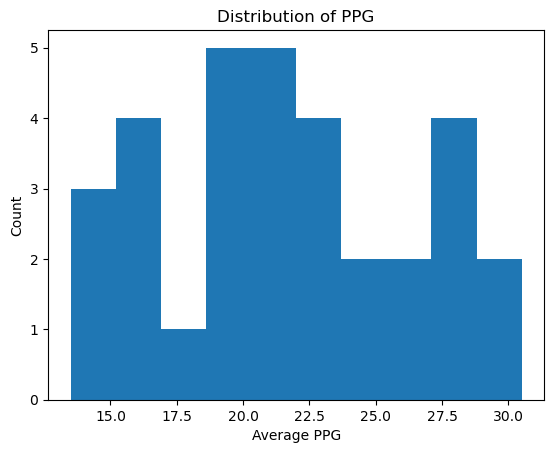

In [440]:
EDA['PPG'].plot(kind='hist')
plt.title('Distribution of PPG')
plt.xlabel('Average PPG')
plt.ylabel('Count')
# Normal distribution, not clear skew

<Axes: ylabel='PPG'>

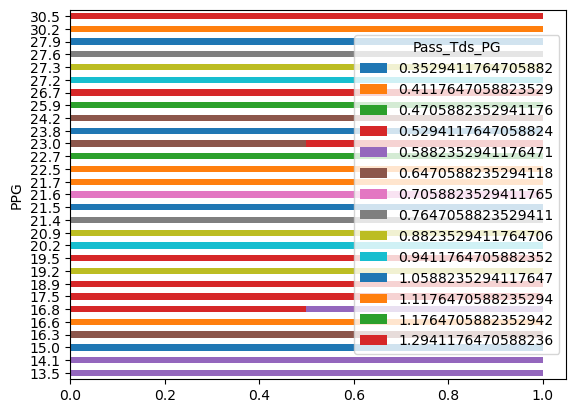

In [441]:
EDA.groupby('PPG')['Pass_Tds_PG'].value_counts(normalize=True).unstack().plot(kind='barh', stacked=True)

In [442]:
corr_mat = EDA.corr()
corr_mat
# Correlation matrix demonstrating how features interact with each other and the target variable

/var/folders/qz/qvyy0rxs3rdfhwskr09cq4q80000gn/T/ipykernel_83210/708128061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = EDA.corr()


PPG  Tot_TDs_PG  1st_Downs_PG  \
PPG                            1.000000    0.951096      0.782081   
Tot_TDs_PG                     0.951096    1.000000      0.851178   
1st_Downs_PG                   0.782081    0.851178      1.000000   
Rush_1st_Downs_PG              0.482455    0.526964      0.640185   
Pass_1st_Downs_PG              0.634291    0.697744      0.777583   
OFF_1st_by_pen_PG              0.005961   -0.026468      0.058712   
3rd_Conv_Rate                  0.691199    0.714962      0.747288   
4th_Conv_Rate                  0.069729    0.009473      0.082724   
Pass_Comp_Rate                 0.663740    0.750347      0.673139   
Pass_Yds_PG                    0.751373    0.792748      0.796544   
Pass_Yds_Per_Attempt           0.774742    0.769875      0.638126   
Pass_Tds_PG                    0.691959    0.763911      0.696521   
Off_Int_PG                    -0.236461   -0.151094      0.083869   
Rush_Att_PG                    0.374173    0.390239      0.456541   
Yds_Per_Rush                   0.321489    0.387104      0.263627   
Rush_Yds_PG                    0.529700    0.529813      0.452121   
Rush_Tds_PG                    0.698304    0.722469      0.603397   
Off_Plays_PG                   0.236294    0.328526      0.602954   
Tot_Yds_PG                     0.899700    0.885250      0.818597   
Kickoffs_Returned_PG          -0.253534   -0.216388     -0.241034   
Avg_K_Return_Yds              -0.013886   -0.025037     -0.135747   
Punts_Returned_PG             -0.119523   -0.136259      0.091661   
Avg_P_Return_Yds               0.000865    0.006428      0.084532   
Int_Forced_PG                  0.217667    0.211359      0.054205   
Avg_I_Return_Yds              -0.095582   -0.066948     -0.083973   
Yds_Per_Punt                  -0.203996   -0.268159     -0.233952   
Punts_PG                      -0.762556   -0.736138     -0.714114   
FG_Conv_Rate                   0.129571   -0.045545     -0.047204   
Touchback_Rate                 0.100731    0.080044      0.134511   
Penalties_PG                   0.020106    0.027420      0.061002   
Avg_Pen_Yds_PG                 0.219160    0.171352      0.194922   
Avg_TOP                        0.536651    0.473749      0.629123   
Fum_Lost_PG                    0.140761    0.164913      0.274507   
Games                               NaN         NaN           NaN   
DEF_PPG_Against               -0.365589   -0.264847     -0.240424   
DEF_Tot_Tds_PG_Against        -0.194225   -0.071425      0.012335   
DEF_1st_Downs_PG_Against      -0.250276   -0.070805     -0.101936   
DEF_Rush_1st_Downs_PG_Against -0.423931   -0.314288     -0.366664   
DEF_Pass_1st_Downs_PG_Against -0.058567    0.101580      0.137623   
DEF_1st_by_pen_PG              0.162756    0.137907     -0.008898   
DEF_3rd_Conv_Rate             -0.248888   -0.152205     -0.088737   
DEF_4th_Conv_Rate             -0.174336   -0.220684     -0.197330   
DEF_Pass_Comp_Rate            -0.025623    0.080893      0.054210   
DEF_Pass_Yds_Per_Attempt      -0.203640   -0.140558     -0.209613   
DEF_Pass_Yds_PG               -0.064259    0.008302     -0.087606   
DEF_Pass_Tds_PG                0.065919    0.137774      0.282080   
DEF_Int_PG                     0.217667    0.211359      0.054205   
DEF_Rush_Att_PG               -0.625709   -0.530520     -0.518231   
DEF_Yds_Per_Rush              -0.141654   -0.141506     -0.182850   
DEF_Rush_Yds_PG               -0.490865   -0.478648     -0.554559   
DEF_Rush_Tds_PG               -0.293508   -0.241076     -0.304750   
DEF_Tot_Plays_PG              -0.282010   -0.083661     -0.078745   
DEF_YPG_Against               -0.270792   -0.197466     -0.354665   
DEF_Kickoffs_Returned_PG       0.154013    0.186473      0.115780   
DEF_Avg_K_Return_Yds           0.189400    0.170800      0.023000   
DEF_Punts_Returned_PG         -0.619383   -0.598306     -0.508624   
DEF_Avg_P_Return_Yds           0.205201    0.153626     -0.058265   
DEF_Avg_I_Return_Yds          -0.0

In [443]:
EDA['PPG'].describe()

count    32.000000
mean     21.693750
std       4.606443
min      13.500000
25%      18.550000
50%      21.550000
75%      24.625000
max      30.500000
Name: PPG, dtype: float64